<div align="center">
<h1 style="color:#2c3e50;">🧠 Tesis Final de Master</h1>
<h2 style="color:#34495e;">Evaluación Sesgos en Compas</h2>
<h3 style="color:#34495e;">Exploración inicial e identificación de sesgos en datos publicados por Propublica</h3>

<img src="https://tecscience.tec.mx/es/wp-content/uploads/sites/8/2023/04/algoritmo-de-riesgo-criminal.jpg" width="800">

**Nuclio Digital School**  
*TFM curso presencial marzo 2025*

---

**Autor:** Azahara Bravo, Daniel Álvarez y María Loza

**Fecha:** 3 de octubre, 2025  
**Versión:** 1.0  

</div>

<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
• • • •
</div>

# 0. **INTRODUCCIÓN AL PROYECTO**

**OBJETIVO DEL PROYECTO**

El objetivo principal de este proyecto es examinar un conjunto de datos sobre reincidencia delictiva en el condado de Broward (EE.UU.) para identificar los factores que pueden estar relacionados con un mayor riesgo de reincidencia, prestando especial atención a la presencia de posibles sesgos en los datos.

Contamos con las puntuaciones de riesgo generadas por el sistema COMPAS para cada individuo, así como con información sobre si efectivamente reincidieron o no durante los dos años posteriores a su evaluación.

Además del análisis exploratorio, el proyecto incluye la evaluación de la precisión y la imparcialidad de las puntuaciones de COMPAS, comparándolas con un modelo predictivo sencillo que desarrollaremos nosotros mismos, procurando minimizar sesgos. Finalmente, los resultados más relevantes del análisis se resumirán en un dashboard interactivo que servirá como herramienta de comunicación de los hallazgos clave y de una memoria del proyecto. 


**CONTEXTUALIZACIÓN DEL ALGORITMO COMPAS**

COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) es una herramienta algorítmica utilizada en Estados Unidos para estimar el riesgo de que una persona reincida en el futuro. Esta herramienta ha sido empleada por jueces y autoridades judiciales para ayudar en decisiones sobre libertad condicional, fianzas o sentencias. Su sistema asigna un puntaje de riesgo (bajo, medio o alto) basado en información personal, antecedentes penales y respuestas a cuestionarios estándar.

**CONTENIDO DEL NOTEBOOK**


1. Configuración del entorno. 

2. Descarga de los datos para la investigación.
    - Lectura de los archivos:
        - compas-scores-raw.csv
        - compas-scores-two-years.csv

3. Exploración inicial de los datasets
   - 3.1 Inspección general de estructura y tipos.
   - 3.2 Comparación de los datos de ambos datasets y controversia.
   - 3.3 Chequeo de carga y esquema (sanity check con check_df):
        - 3.3.1 Check_df a raw_df_original.
        - 3.3.2 Check_df a twoyear_df_original.
   - 3.4 Análisis de columnas, tipos y valores únicos:
        - 3.4.1 Raw_df_original.
        - 3.4.2 Twoyear_df_original.
        - 3.4.3 Comprobación de la existencia de PK.
    
4. Análisis de calidad de los datos:
   - 4.1 Nulos, duplicados y detección de outliers.
   - 4.2 Limpieza y transformación de datos.


5. Estdísticas descriptivas:
   - 5.1 Estadísticas básicas:
     -  Estadísticas numéricas.
     -  Estadísticas categóricas.
   - 5.2 Distribuciones por grupo:
     -  5.2.1 Media y desviación estándar de puntuación Compas por raza, sexo y edad.
     -  5.2.2 Media y desviación estándar de antecedentes por raza.
     -  5.2.3 Distribuciones cruzadas con reincidencia real. 

6. Visualizaciones exploratorias: EDA univariante. 
    - 6.1 Histogramas de variables numéricas relevantes (edad, resultado_compas, antecedentes).
    - 6.2 Barras para variables categóricas (etnia, genero, rango_edad, resultado_compas_grado, reincide).
    

7. Análisis demográfico del dataset
    - 7.1 Comparación de tamaño entre grupos
    - 7.2 Análisis exploratorio de las puntuaciones de Compas. 
        - 7.2.1 Boxplots e histograma del resultado Compas por etnia, género y rango_edad.
        - 7.2.2 Niveles de riesgo por grupo.
        - 7.2.3 Conteo resultado compas por grupo. 
    - 7.3 Proporciones de reincidencia por etnia, género, rango_edad.
    - 7.4 Análisis de antecedentes previos por etnia y género.


8. Comparación entre riesgo y realidad:
    - 8.1 Distribución de la reincidencia por score.
    - 8.2 Comparación del riesgo medio vs la renicidencia real por grupos. 
        - 8.2.1 Reescalado.
    - 8.3  Correlación de Spearman:
        - 8.3.1 Spearman Global. 
        - 8.3.2 Por grupos (variables demográficas).
        - 8.3.3 Visualización
    - 8.4 Conclusiones
    

9. Evaluación preliminar de sesgos:
    - 9.1 Estadística descriptiva por grupo.
    - 9.2 Pruebas de significancia.
    - 9.3 Control de condiciones objetivas. 
        - 9.3.1 Cohortes.
        - 9.3.2 Cohortes por grupos, antecedentes y grado cargo.

10. Primeras conclusiones e insights
    - Insights EDA: hallazgos preliminares de posibles sesgos
    - Conclusiones de la valoración preliminar de sesgos. 

---

<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
• • • •
</div>

# 1. **CONFIGURACIÓN DEL ENTORNO**

In [5]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np


# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sqlalchemy import create_engine
import sqlalchemy
import mysql.connector as mysql


# Correlación de Spearman
from scipy.stats import spearmanr

# Pruebas estadísticas
from scipy.stats import f_oneway, ttest_ind, kruskal


# Sesgos
from scipy import stats

# Expresiones regulares
import re

#detección y corrección de errores ortográficos
#from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

# mi archivo con funciones definidas
import lib_propias as prop


# Nulos
import missingno as msno

# Fechas
from datetime import datetime


In [6]:
# Configuración general de estilo para visualizaciones

# Tema visual clásico con fondo claro y grilla suave
plt.style.use('seaborn-v0_8')

# Paleta de colores moderna y profesional
sns.set_palette("husl")

# Tamaño estándar para gráficos (ancho x alto en pulgadas)
plt.rcParams['figure.figsize'] = (12, 6)

# Tamaño general de las fuentes en los gráficos
plt.rcParams['font.size'] = 11


In [7]:
import plotly.io as pio

# Crear un template personalizado similar al estilo seaborn-v0_8
pio.templates["custom"] = pio.templates["plotly_white"]

pio.templates["custom"].layout.update(
    font=dict(size=11, family='Arial'),
    width=1000,  # equivalente aprox a figsize=(12,6)
    height=500,
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    colorway=px.colors.qualitative.Set2  # paleta similar a sns.husl
)

# Establecer este template como predeterminado
pio.templates.default = "custom"


---

<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
• • • •
</div>

# 2. **DESCARGA DE LOS DATOS PARA LA INVESTIGACIÓN**

---

In [8]:
from pathlib import Path


# Ruta a la carpeta de datos (sube un nivel desde "notebook" y entra en "data")
DATA = Path("../data/raw_propublica")

# Cargar datasets originales
raw_df_original = pd.read_csv(DATA / "compas-scores-raw.csv")
twoyear_df_original = pd.read_csv(DATA / "compas-scores-two-years.csv")

print("✅ Datos cargados correctamente")
print("raw_df_original:", raw_df_original.shape)
print("twoyear_df_original:", twoyear_df_original.shape)


✅ Datos cargados correctamente
raw_df_original: (60843, 28)
twoyear_df_original: (7214, 53)


---

<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
• • • •
</div>

# **3. EXPLORACIÓN INICIAL DE LOS DATASETS**

## **3.1 INSPECCIÓN GENERAL DE ESTRUCTURA Y TIPOS**

#### Dimensiones, tipos de datos e info general

In [9]:
#  Inspección inicial de los datasets

# 1. Dimensiones de los datasets
print("📏 DIMENSIONES DE LOS DATASETS:")
print(f"- raw_df_original: {raw_df_original.shape[0]:,} filas, {raw_df_original.shape[1]} columnas")
print(f"- twoyear_df_original: {twoyear_df_original.shape[0]:,} filas, {twoyear_df_original.shape[1]} columnas\n")

# 2. Tipos de datos
print("📋 TIPOS DE DATOS - raw_df_original:")
display(raw_df_original.dtypes.value_counts())
display(raw_df_original.dtypes)

print("\n📋 TIPOS DE DATOS - twoyear_df_original:")
display(twoyear_df_original.dtypes.value_counts())
display(twoyear_df_original.dtypes)

# 3. Información general
print("\nℹ️ INFO GENERAL - raw_df_original:")
display(raw_df_original.info())

print("\nℹ️ INFO GENERAL - twoyear_df_original:")
display(twoyear_df_original.info())

# 4. Diferencias clave en columnas
columnas_raw = set(raw_df_original.columns)
columnas_2y = set(twoyear_df_original.columns)

print("\n🔍 COLUMNAS ÚNICAS EN raw_df_original:")
display(columnas_raw - columnas_2y)

print("\n🔍 COLUMNAS ÚNICAS EN twoyear_df_original:")
display(columnas_2y - columnas_raw)

print("\n✅ COLUMNAS EN COMÚN:")
display(columnas_raw & columnas_2y)

print("\n📊 COMPARATIVA DE COLUMNAS:")
print(f"- Total en raw_df_original: {len(columnas_raw)} columnas")
print(f"- Total en twoyear_df_original: {len(columnas_2y)} columnas")
print(f"- En común: {len(columnas_raw & columnas_2y)} columnas")
print(f"- Solo en raw_df_original: {len(columnas_raw - columnas_2y)}")
print(f"- Solo en twoyear_df_original: {len(columnas_2y - columnas_raw)}")


📏 DIMENSIONES DE LOS DATASETS:
- raw_df_original: 60,843 filas, 28 columnas
- twoyear_df_original: 7,214 filas, 53 columnas

📋 TIPOS DE DATOS - raw_df_original:


object     18
int64       9
float64     1
Name: count, dtype: int64

Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text               object
Ethnic_Code_Text            object
DateOfBirth                 object
ScaleSet_ID                  int64
ScaleSet                    object
AssessmentReason            object
Language                    object
LegalStatus                 object
CustodyStatus               object
MaritalStatus               object
Screening_Date              object
RecSupervisionLevel          int64
RecSupervisionLevelText     object
Scale_ID                     int64
DisplayText                 object
RawScore                   float64
DecileScore                  int64
ScoreText                   object
AssessmentType              object
IsCompleted                  int64
IsDeleted                    int64
dtype: object


📋 TIPOS DE DATOS - twoyear_df_original:


object     33
int64      16
float64     4
Name: count, dtype: int64

id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_arrest_date               object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_case_number               object
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date      


ℹ️ INFO GENERAL - raw_df_original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15624 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null 

None


ℹ️ INFO GENERAL - twoyear_df_original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null

None


🔍 COLUMNAS ÚNICAS EN raw_df_original:


{'Agency_Text',
 'AssessmentID',
 'AssessmentReason',
 'AssessmentType',
 'Case_ID',
 'CustodyStatus',
 'DateOfBirth',
 'DecileScore',
 'DisplayText',
 'Ethnic_Code_Text',
 'FirstName',
 'IsCompleted',
 'IsDeleted',
 'Language',
 'LastName',
 'LegalStatus',
 'MaritalStatus',
 'MiddleName',
 'Person_ID',
 'RawScore',
 'RecSupervisionLevel',
 'RecSupervisionLevelText',
 'ScaleSet',
 'ScaleSet_ID',
 'Scale_ID',
 'ScoreText',
 'Screening_Date',
 'Sex_Code_Text'}


🔍 COLUMNAS ÚNICAS EN twoyear_df_original:


{'age',
 'age_cat',
 'c_arrest_date',
 'c_case_number',
 'c_charge_degree',
 'c_charge_desc',
 'c_days_from_compas',
 'c_jail_in',
 'c_jail_out',
 'c_offense_date',
 'compas_screening_date',
 'days_b_screening_arrest',
 'decile_score',
 'decile_score.1',
 'dob',
 'end',
 'event',
 'first',
 'id',
 'in_custody',
 'is_recid',
 'is_violent_recid',
 'juv_fel_count',
 'juv_misd_count',
 'juv_other_count',
 'last',
 'name',
 'out_custody',
 'priors_count',
 'priors_count.1',
 'r_case_number',
 'r_charge_degree',
 'r_charge_desc',
 'r_days_from_arrest',
 'r_jail_in',
 'r_jail_out',
 'r_offense_date',
 'race',
 'score_text',
 'screening_date',
 'sex',
 'start',
 'two_year_recid',
 'type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'v_type_of_assessment',
 'violent_recid',
 'vr_case_number',
 'vr_charge_degree',
 'vr_charge_desc',
 'vr_offense_date'}


✅ COLUMNAS EN COMÚN:


set()


📊 COMPARATIVA DE COLUMNAS:
- Total en raw_df_original: 28 columnas
- Total en twoyear_df_original: 53 columnas
- En común: 0 columnas
- Solo en raw_df_original: 28
- Solo en twoyear_df_original: 53


El resultado del análisis general de la estructura y los tipos de datos nos relata que hay diferente número de columnas y que no hay ninguna en común. Vemos también la ausencia de datos en formato datatime que habíamos previsto ya, al igual que valores booleanos no están como tal. 

En el siguiente apartado vamos a justificar las diferencias que vemos que existen entre ambos datasets, pero para ello se realiza una investigación sobre ambos. 

---

## **3.2 COMPARACIÓN DE LOS DATOS DE AMBOS DATASETS** 

Con este código buscamos una **mirada rápida** para entender si los dos datasets (RAW y TWO-YEARS)  
**se parecen en lo básico** o si ya vienen **diferentes** por cómo se han filtrado/creado.

- **Tamaños**: veo cuántas filas y columnas tiene cada uno (recordatorio: no son iguales).
- **Composición**: comparo **% por etnia y sexo** en cada dataset.  
  Si cambian mucho, lo apunto porque puede afectar las conclusiones.
- **Puntajes COMPAS**: miro el **histograma de deciles** en cada dataset para ver si la distribución es similar  
  o si el TWO-YEARS está concentrado en algunos rangos.
- **Objetivo (reincidencia)**: calculo la **tasa base** en TWO-YEARS (en RAW no aplica).  
  Esto me da una referencia para interpretar métricas más adelante.

> **OJO (qué NO es)**:  
> - No estamos uniendo datasets ni comprobando claves.  
> - No demuestra sesgo por sí mismo; solo nos dice **dónde podría haber diferencias** que mirar luego.

**INSIGHT a buscar**: si los % por etnia/sexo o la forma del histograma cambian mucho entre RAW y TWO-YEARS,  
es normal que más adelante aparezcan resultados distintos.  
**CAUTION**: anotar estas diferencias ahora evita malinterpretar las métricas de sesgo después.

In [10]:

# --- Localizador de columnas robusto (ES/EN, case-insensitive) ---
def col(df, *names):
    cols_lower = {c.lower(): c for c in df.columns}
    for n in names:
        if n in df.columns:
            return n
        if n.lower() in cols_lower:
            return cols_lower[n.lower()]
    return None

# --- Columnas en cada dataset ---
race_raw = col(raw_df_original, 'etnia','race','Ethnic_Code_Text')
sex_raw  = col(raw_df_original, 'genero','sexo','sex','Sex_Code_Text')
dec_raw  = col(raw_df_original, 'puntaje_decil','decil','decile_score','DecileScore')

race_2y  = col(twoyear_df_original, 'etnia','race')
sex_2y   = col(twoyear_df_original, 'genero','sexo','sex')
dec_2y   = col(twoyear_df_original, 'puntaje_decil','decil','decile_score')
y_2y     = col(twoyear_df_original, 'reincide','two_year_recid','reincidencia_2a')

# --- 1) Tamaños (usa nuestro estilo de tabla estándar) ---
pd.DataFrame({
    'dataset': ['raw_df_original','twoyear_df_original'],
    'filas':   [len(raw_df_original), len(twoyear_df_original)],
    'columnas':[raw_df_original.shape[1], twoyear_df_original.shape[1]]
})

# --- Helpers ---
def pct(df, c):
    return (df[c].value_counts(normalize=True) * 100).round(1) if c else pd.Series(dtype='float')

def plot_pct_compare(series_raw, series_2y, titulo):
    """Gráfico de barras agrupadas con estilo homogéneo (Plotly)."""
    cats = sorted(set(series_raw.index) | set(series_2y.index), key=str)
    df_plot = pd.DataFrame({
        'Categoría': cats,
        'RAW_%': series_raw.reindex(cats).fillna(0).values,
        'TWOYEARS_%': series_2y.reindex(cats).fillna(0).values
    })
    df_melt = df_plot.melt(id_vars='Categoría', value_vars=['RAW_%','TWOYEARS_%'],
                           var_name='Dataset', value_name='Porcentaje')

    fig = px.bar(df_melt, x='Categoría', y='Porcentaje', color='Dataset', barmode='group',
                 text='Porcentaje', title=titulo)
    fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
    fig.update_layout(
        xaxis_title="Categoría", yaxis_title="Porcentaje (%)",
        plot_bgcolor='rgba(255, 255, 255, 1)',
        xaxis_showgrid=True, xaxis_gridcolor='lightgrey',
        yaxis_showgrid=True, yaxis_gridcolor='lightgrey'
    )
    fig.show()

# --- 2) Distribuciones por %: ETNIA y SEXO ---
if race_raw or race_2y:
    s_raw = pct(raw_df_original, race_raw) if race_raw else pd.Series(dtype='float')
    s_2y  = pct(twoyear_df_original, race_2y) if race_2y else pd.Series(dtype='float')
    display(pd.DataFrame({'RAW_%': s_raw, 'TWOYEARS_%': s_2y}).fillna(0))
    if (len(s_raw) + len(s_2y)) > 0:
        plot_pct_compare(s_raw, s_2y, 'Distribución por etnia — comparación')

if sex_raw or sex_2y:
    s_raw = pct(raw_df_original, sex_raw) if sex_raw else pd.Series(dtype='float')
    s_2y  = pct(twoyear_df_original, sex_2y) if sex_2y else pd.Series(dtype='float')
    display(pd.DataFrame({'RAW_%': s_raw, 'TWOYEARS_%': s_2y}).fillna(0))
    if (len(s_raw) + len(s_2y)) > 0:
        plot_pct_compare(s_raw, s_2y, 'Distribución por sexo — comparación')

# --- 3) Histogramas de deciles ---
if dec_raw:
    fig = px.histogram(raw_df_original, x=dec_raw, nbins=10,
                       title=f"RAW — Histograma {dec_raw}")
    fig.update_layout(
        xaxis_title="Decil", yaxis_title="Frecuencia",
        plot_bgcolor='rgba(255, 255, 255, 1)',
        xaxis_showgrid=True, xaxis_gridcolor='lightgrey',
        yaxis_showgrid=True, yaxis_gridcolor='lightgrey'
    )
    fig.show()

if dec_2y:
    fig = px.histogram(twoyear_df_original, x=dec_2y, nbins=10,
                       title=f"TWO-YEARS — Histograma {dec_2y}")
    fig.update_layout(
        xaxis_title="Decil", yaxis_title="Frecuencia",
        plot_bgcolor='rgba(255, 255, 255, 1)',
        xaxis_showgrid=True, xaxis_gridcolor='lightgrey',
        yaxis_showgrid=True, yaxis_gridcolor='lightgrey'
    )
    fig.show()

# --- 4) Tasa global del objetivo (solo two-years) ---
if y_2y:
    tasa = twoyear_df_original[y_2y].mean()
    print(f"Tasa global objetivo en TWO-YEARS ({y_2y}): {tasa:.3f} ({tasa*100:.1f}%)")
else:
    print("Objetivo (reincidencia) no disponible en RAW; solo aplica a TWO-YEARS.")


,RAW_%,TWOYEARS_%
African-Am,0.1,0.0
African-American,44.4,51.2
Arabic,0.1,0.0
Asian,0.5,0.4
Caucasian,35.8,34.0
Hispanic,14.4,8.8
Native American,0.4,0.2
Oriental,0.1,0.0
Other,4.3,5.2


,RAW_%,TWOYEARS_%
Male,78.1,80.7
Female,21.9,19.3


Tasa global objetivo en TWO-YEARS (two_year_recid): 0.451 (45.1%)


##### ---**DIFERENCIAS ENTRE AMBOS Y CONTROVERSIA ENCONTRADA EN NUESTRA BÚSQUEDA** ---

Por qué investigamos los datasets entregados (raw vs. two-years):

Para este TFM tenemos dos ficheros: un raw (histórico amplio con muchas variables operativas) y un two-years (muestra filtrada y ya orientada al análisis de reincidencia a 2 años). En este primer análisis detectamos que no compartían el mismo esquema: nombres y número de columnas distintos y, sobre todo, sin una clave primaria común que permita una unión directa y fiable entre ambos (el raw incluye identificadores internos; el two-years usa campos como nombre y fecha de nacimiento). Esto no es un error nuestro: en la fuente original, ProPublica publica ambos ficheros como artefactos distintos del mismo proyecto (compas-scores-raw.csv y compas-scores-two-years.csv), con finalidades diferentes. 



#####  ---**ORÍGEN Y PROPÓSITO DE LOS DATASETS**---

Descripción de los datasets:

- **compas-scores-raw.csv (RAW)**  
  Dataset amplio con evaluaciones COMPAS en Broward County (2013–2014).  
  **Dimensiones (nuestro fichero): 60.843 filas × 28 columnas.**

- **compas-scores-two-years.csv (TWO-YEARS)**  
  Subconjunto filtrado para analizar **reincidencia a 2 años** desde la evaluación.  
  **Dimensiones (nuestro fichero): 7.214 filas × 53 columnas.**

  
    [ProPublica][2]

    [2]: https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm?utm_source=chatgpt.com "How We Analyzed the COMPAS Recidivism Algorithm - ProPublica"


    ProPublica descartó datos de reincidencia fuera del periodo deseado y también casos puntuales. En el dataset “two‑years”, muchas columnas del raw se renombraron o transformaron, y solo se incluyó una selección de casos.

##### ---**CAMBIOS EN NOMBRES DE COLUMNAS Y SELECCIÓN DE CASOS**---

El dataset twoyears no solo filtra por tiempo, sino que cambia nombres de columnas (p. ej. decile_score, two_year_recid, etc.), eliminando variables menos relevantes para ese análisis específico.

La transformación buscaba facilitar análisis binarios de recidivismo, pero dificultó comparaciones directas con el dataset raw.

El fichero two-years no es un “volcado bruto”, sino el resultado de decisiones metodológicas: ProPublica seleccionó a personas evaluadas con COMPAS en 2013–2014 en Broward County, cruzó esos registros con historiales judiciales y definió la reincidencia como un nuevo arresto dentro de los 2 años posteriores a la evaluación, excluyendo ciertas categorías (p. ej., tráfico o failure to appear). Además, el emparejamiento se hizo por nombre y fecha de nacimiento, con un error estimado en el matching. Estas elecciones afectan la composición final de la muestra y, por tanto, los resultados. 

##### ---**CONTROVERSIA METODOLÓGICA (BARESTEIN, 2019)**---  

Un trabajo académico (Barenstein, 2019) identificó un error grave en la construcción del dataset “two‑years”:
ProPublica no aplicó correctamente el corte de dos años para los recidivistas, aunque sí lo hizo para los no recidivistas; esto provocó una sobrerrepresentación de reincidentes en el conjunto.

La tasa real de recidivismo se infló desde ~36 % a ~45 % por el error. 
huggingface.com
[Barestein, 2019](https://arxiv.org/pdf/1906.04711)


A partir de 2016 se abrió un debate público: Northpointe/Equivant (la empresa del COMPAS) cuestionó la metodología de ProPublica y defendió otras métricas de equidad (p. ej., paridad predictiva), mientras que ProPublica respondió técnicamente manteniendo su enfoque y hallazgos sobre diferencias en errores por raza. Esta discusión—qué métrica de “justicia” es la adecuada y cómo afectan las reglas de limpieza/selección—es la base de la controversia que rodea al two-years. En nuestro trabajo lo abordamos como contexto y referenciamos las fuentes para que tengamos todos en cuenta **qué mide exactamente el dataset y con qué limitaciones o falta de ellas**.


##### ---**CONSECUENCIAS EN EL ANÁLISIS DE SESGOS**--- 

Asumiendo el descubrimiento de Barstein cabe pensar que es un riesgo que los estudios de fairness han utilizado mucho el dataset two_years, sin advertir de este sesgo de selección implícita, lo que puede distorsionar métricas de recidivismo y sesgos raciales.

La discrepancia en filtrado hace que las comparaciones entre grupos (por raza, género, tipo de delito) puedan estar sesgadas. 
[Allendowney](https://allendowney.github.io/RecidivismCaseStudy/02_calibration.html?utm_source=chatgpt.com)

##### ---**RESUMIENDO** ---


- ProPublica creó el archivo two_years para facilitar análisis binarios (recidivismo sí/no) frente a su dataset raw.

- En ese proceso, renombraron columnas y seleccionaron casos según criterios operativos.

- Pero una lógica condicional diferente aplicada a recidivistas vs. no recidivistas generó sesgo de muestreo accidental. 



---------------------------------------------------------------------------------------------------------------

## **3.3 CHEQUEO DE CARGA Y ESQUEMA (SANITY CHECK CON PROP.CHECK_DF)**

Vamos a comenzar con el chequeo inicial de nuestra librería en el que vamos a ver los datos más importantes para el análisis de ambos datasets. 

---

### **3.3.1 CHECK_DF A RAW_DF_ORIGINAL**

In [11]:
prop.check_df(raw_df_original)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 60,843 filas y 28 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0
60842,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,18,Risk of Failure to Appear,16.00,2,Low,New,1,0



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
28054,45960,67518,46305,PRETRIAL,Rodriguez,Raymond,NaN,Male,Hispanic,12/18/91,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.66,9,High,New,1,0
14399,44649,62446,56669,PRETRIAL,Rodriguez,Deanna,NaN,Female,Caucasian,12/27/87,...,4,High,18,Risk of Failure to Appear,31.00,9,High,New,1,0
873,46767,57458,50377,PRETRIAL,Torres,Adrian,Jose,Male,Caucasian,02/21/94,...,2,Medium,7,Risk of Violence,-1.60,6,Medium,Copy,1,0
36320,59648,70530,62009,Probation,COBB,CYNTHIA,NaN,Female,Caucasian,08/18/64,...,1,Low,18,Risk of Failure to Appear,23.00,5,Medium,New,1,0
29804,33563,68154,32666,PRETRIAL,NICOLETTI,RENZO,NaN,Male,Caucasian,06/15/91,...,2,Medium,18,Risk of Failure to Appear,14.00,1,Low,New,1,0



########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text               object
Ethnic_Code_Text            object
DateOfBirth                 object
ScaleSet_ID                  int64
ScaleSet                    object
AssessmentReason            object
Language                    object
LegalStatus                 object
CustodyStatus               object
MaritalStatus               object
Screening_Date              object
RecSupervisionLevel          int64
RecSupervisionLevelText     object
Scale_ID                     int64
DisplayText                 object
RawScore                   float64
DecileScore   

,Person_ID,AssessmentID,Case_ID,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsCompleted,IsDeleted
count,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.0,60843.0
mean,53683.206154,68061.029190,60209.128149,21.819536,1.630048,11.000000,5.081457,3.571701,1.0,0.0
std,14363.648515,7320.208226,9638.501654,0.932614,0.944220,4.966596,10.080518,2.617854,0.0,0.0
min,656.000000,649.000000,350.000000,17.000000,1.000000,7.000000,-4.790000,-1.000000,1.0,0.0
25%,52039.000000,62582.000000,56021.000000,22.000000,1.000000,7.000000,-2.090000,1.000000,1.0,0.0
50%,57321.000000,68229.000000,61261.000000,22.000000,1.000000,8.000000,-0.710000,3.000000,1.0,0.0
75%,62748.000000,73870.000000,66554.000000,22.000000,2.000000,18.000000,14.000000,5.000000,1.0,0.0
max,68608.000000,79678.000000,72045.000000,22.000000,4.000000,18.000000,51.000000,10.000000,1.0,0.0



########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevelText,DisplayText,ScoreText,AssessmentType
count,60843,60843,60843,15624,60843,60843,60843,60843,60843,60843,60843,60843,60843,60843,60843,60843,60798,60843
unique,4,10896,7225,1870,2,9,10382,2,1,2,7,6,7,705,4,3,3,2
top,PRETRIAL,Williams,Michael,A,Male,African-American,04/28/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,3/21/13 0:00,Low,Risk of Violence,Low,New
freq,41100,417,777,606,47514,27018,30,58647,60843,60591,37578,30129,45126,183,38472,20281,41487,56139


<div style="background-color:#fff3cd; padding:10px; border-left:4px solid #ffc107; margin:10px 0; color:#2c3e50;">
<strong>⚠️ Advertencia:</strong> no hay formato DATE o DATETIME, ni BOOL
</div>


🔍 **REVISIÓN GENERAL DE LOS DATOS(check_df)**

*Dataset: compas-scores-raw.csv*

**Información general**
- Filas: 60.843
- Columnas: 28
- No hay duplicados.

**Tipos de variables**
- Variables numéricas: 10 columnas (ID, puntuaciones, marcadores de estado…)
- Variables categóricas: 18 columnas (sexo, raza, tipo de evaluación, idioma, estado civil…)
- Variables temporal mal identificada.
- Variable categorica binaria mal identificada.

**Valores únicos y problemas detectados**
- La columna MiddleName contiene muchos valores nulos (74% del total).
- La columna ScoreText tiene 45 valores nulos.
- El resto de columnas no presenta problemas importantes de nulos.
- No hay duplicados totales.

**Estadísticas básicas**
- Las puntuaciones de COMPAS (DecileScore, RawScore) van de 1 a 10, como se espera.
- Las variables categóricas como Sex_Code_Text y Ethnic_Code_Text tienen valores esperados (ej. Male/Female, Caucasian, African-American, etc.).

💡 **Comentario inicial**
Este dataset es más amplio y contiene múltiples tipos de evaluaciones. Es más completo pero también más desordenado. Sería útil para contrastar la calidad de las predicciones con el otro dataset (two_years), aunque necesitaremos filtrar columnas para centrarnos solo en el riesgo de reincidencia.

##### ACCIONES A TOMAR PARA LA LIMPIEZA DE ESTE DATASET


1. Revisar los Nan de ScoreText y decidir qué hacer con ellos. 
2. Transformar las dos columnas de fecha a DateTime.
3. Transformar las columnas bool. 
4. Unificar etnias African-American con African-Am.
5. Eliminar columnas no necesarias.
6. Renombrar columnas.
7. Reorganizar orden de las columnas.
8. Guardar dataframe y crear csv nuevo. 
9. Crear tres dataframe y csv con las tres clasificaciones de riesgos para facilitar el análisis. 

---

### **3.3.2 CHECK_DF A TWOYEAR_DF_ORIGINAL**

In [12]:
prop.check_df(twoyear_df_original)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 7,214 filas y 53 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0
7213,11001,florencia sanmartin,florencia,sanmartin,2014-06-30,Female,1992-12-18,23,Less than 25,Hispanic,...,4,Low,2014-06-30,2015-03-15,2015-03-15,2,0,258,0,1



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
7186,10964,terrence brown,terrence,brown,2013-02-23,Male,1979-06-08,36,25 - 45,African-American,...,2,Low,2013-02-23,2013-02-22,2013-04-21,9,57,1133,0,0
3362,5148,dustin bouchard,dustin,bouchard,2014-01-06,Male,1988-07-06,27,25 - 45,Caucasian,...,3,Low,2014-01-06,2015-10-20,2015-10-21,0,0,652,1,1
3455,5281,juan reinoso amaya,juan,reinoso amaya,2013-01-07,Male,1993-02-21,23,Less than 25,Hispanic,...,5,Medium,2013-01-07,2013-01-07,2013-01-09,0,2,1180,0,0
2839,4338,louis smith,louis,smith,2013-09-26,Male,1965-11-24,50,Greater than 45,African-American,...,1,Low,2013-09-26,2013-10-25,2013-11-26,5,0,29,0,0
4247,6484,linda mashaw,linda,mashaw,2013-12-11,Female,1963-06-02,52,Greater than 45,Caucasian,...,1,Low,2013-12-11,2013-12-05,2013-12-06,0,0,842,0,0



########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_arrest_date               object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc 

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000



########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,name,first,last,compas_screening_date,sex,dob,age_cat,race,c_jail_in,c_jail_out,...,vr_offense_date,vr_charge_desc,type_of_assessment,score_text,screening_date,v_type_of_assessment,v_score_text,v_screening_date,in_custody,out_custody
count,7214,7214,7214,7214,7214,7214,7214,7214,6907,6907,...,819,819,7214,7214,7214,7214,7214,7214,6978,6978
unique,7158,2800,3950,690,2,5452,3,6,6907,6880,...,570,83,1,3,690,1,3,690,1156,1169
top,anthony smith,michael,williams,2013-02-20,Male,1987-12-21,25 - 45,African-American,2013-08-13 06:03:42,2013-09-12 10:31:00,...,2015-08-15,Battery,Risk of Recidivism,Low,2013-02-20,Risk of Violence,Low,2013-02-20,2014-01-04,2020-01-01
freq,3,149,83,32,5819,5,4109,3696,1,3,...,6,329,7214,3897,32,7214,4761,32,20,61


<div style="background-color:#fff3cd; padding:10px; border-left:4px solid #ffc107; margin:10px 0; color:#2c3e50;">
<strong>⚠️ Advertencia:</strong> no hay formato DATE o DATETIME, tampoco BOOL
</div>


**Información general**
- Filas: 7.214
- Columnas: 53
- No hay duplicados.

**Tipos de variables**
- Variables numéricas: 20 columnas (edad, número de delitos, scores, recidiva...)
- Variables categóricas: 33 columnas (sexo, raza, fecha, tipo de cargo, etc.)
- Variables temporal mal identificada.
- Variable categorica binaria mal identificada.

**Valores únicos y problemas detectados**
- Hay muchos nulos en columnas relacionadas con reincidencia violenta (violent_recid, vr_case_number, r_charge_desc, etc.).
- Las columnas clave para nuestro análisis (sex, race, decile_score, score_text, two_year_recid) no tienen nulos, lo cual es excelente.
- Variables como c_arrest_date, r_offense_date, y c_charge_desc tienen miles de valores nulos.

**Estadísticas básicas**
- La columna two_year_recid tiene 2 valores (0 y 1), que usaremos como variable objetivo.
- Las puntuaciones (decile_score) van del 1 al 10.
- La variable score_text clasifica el riesgo como “Low”, “Medium” o “High”.

💡 **Comentario inicial**
Este dataset es mucho más limpio y está centrado específicamente en la predicción de reincidencia en dos años, que es el foco de nuestro proyecto. Es el más apropiado para hacer análisis de sesgos, evaluación de los scores y entrenamiento de un modelo alternativo, **siempre teniendo en cuenta que no existen todos los casos para que sea una muestra fiable**.

<div style="background-color:#e8f4fd; padding:10px; border-left:4px solid #3498db; margin:10px 0; color:#2c3e50;">
<strong>💡 Nota importante:</strong> **INTERPRETACIÓN**
</div>

**CONTEXTO** Con un seguimiento longitudinal de delincuentes durante 2 años, los valores nulos tienen una interpretación muy diferente:

* Los nulos aquí probablemente representan "no ocurrió el evento":

* Violent_recid (100% nulos): Probablemente esta variable no se completó en el dataset o hay un problema en la codificación
* Variables vr_* (~88% nulos): Es lógico - significa que ~88% de los individuos NO tuvieron reincidencia violenta en esos 2 años.
* Fechas de cárcel/arresto (67-84% nulos): Normal - no todos reinciden o van a prisión durante el período de seguimiento<

---------------------------------------------------------------------------------------------------------------

---

## **3.4 ANÁLISIS DE COLUMNAS, TIPOS Y VALORES ÚNICOS**




En esta sección se realiza un análisis más estratégico de las columnas: no solo se identifican tipos y valores únicos, sino que se **profundiza en el significado y la utilidad real de cada variable** para el análisis de sesgos y predicción de reincidencia.

A partir de este análisis:

- Se toma la **decisión fundamentada de trabajar exclusivamente con el dataset `twoyears_df_original`**, ya que no existe una clave primaria común para unirlo con `raw_df_original`.
- Se elabora un **dataframe resumen con la descripción e interpretación de las columnas del dataset seleccionado**.
- Se identifican columnas innecesarias, redundantes o irrelevantes para el propósito del TFM. 
- Se definen las variables clave para el análisis posterior (p. ej. `two_year_recid`, `decile_score`, `score_text`, `race`, etc.) 

Este paso es clave porque traduce la exploración técnica en **decisiones analíticas concretas** que marcan el rumbo del proyecto.

---

### **3.4.1 RAW_DF_ORIGINAL**

In [13]:
# Visualizar cuantos valores únicos hay por columna para entenderlas.
raw_df_original.nunique()


Person_ID                  18610
AssessmentID               20281
Case_ID                    19530
Agency_Text                    4
LastName                   10896
FirstName                   7225
MiddleName                  1870
Sex_Code_Text                  2
Ethnic_Code_Text               9
DateOfBirth                10382
ScaleSet_ID                    2
ScaleSet                       2
AssessmentReason               1
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               705
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       3
DisplayText                    3
RawScore                     659
DecileScore                   11
ScoreText                      3
AssessmentType                 2
IsCompleted                    1
IsDeleted                      1
dtype: int64

**CREO UNA FUNCIÓN PARA ANALIZAR LAS COLUMNAS CON MENOS DE 12 VALORES ÚNICOS Y ENTENDER EL DATAFRAME** 🔧

Este paso me ayuda a identificar rápidamente las variables categóricas “manejables” (binarias, nominales u ordinales simples) que son buenas candidatas para:

- Describir el dataset con claridad (barras/porcentajes fáciles de leer).
- Comparar grupos clave (p. ej., etnia, género, rango de edad) y detectar desbalances fuertes.
- Definir variables importantes para el análisis de sesgo y la modelización (útiles para estratificar métricas como FPR/TPR, o para dummies sin explosión de cardinalidad).
- Homogeneizar categorías (corregir mayúsculas/minúsculas, valores raros, códigos duplicados) antes de avanzar.
- Evitar problemas de modelado por variables con demasiadas categorías (que generan matrices dispersas o sobreajuste).

INSIGHT: muchas variables críticas de equidad (etnia, género, score_text, rango_edad, c_charge_degree) tienen cardinalidad baja; ver sus valores únicos y porcentajes me permite priorizarlas.

CAUTION: que una columna tenga pocos valores únicos no siempre significa que sea “nominal pura”:
-   decile_score tiene 10 valores pero es ordinal.
-   Códigos numéricos con pocas categorías podrían ser rangos; hay que tratarlos como ordenados si procede.


Objetivo de este bloque: listar estas columnas “de baja cardinalidad”, ver qué valores existen y marcar cuáles nos interesan para el análisis posterior (comparativas, tablas de contingencia, métricas por grupo, y features del modelo).

In [14]:
# Para centrarnos en las columnas que nos interesan creo una función para visualizar aquellas columnas que puedo usar en futuro para el ánalisis
def explorar_columnas_categoricas(df, umbral=12, guardar=False):
    """
    Muestra columnas con pocos valores únicos y sus valores únicos.
    Opcionalmente permite guardar las columnas seleccionadas como importantes para análisis.

    Args:
        df (pd.DataFrame): DataFrame a analizar
        umbral (int): Máximo de valores únicos para considerar la columna como categórica simple
        guardar (bool): Si True, pide al usuario marcar qué columnas guardar

    Returns:
        df_resumen (pd.DataFrame): Resumen de columnas categóricas (si guardar=True)
    """
    # Paso 1: detectar columnas con pocos valores únicos
    resumen = pd.DataFrame({
        'columna': df.columns,
        'n_unicos': df.nunique(),
        'tipo': df.dtypes
    })

    resumen_filtrado = resumen[resumen['n_unicos'] < umbral].copy()

    print(f"\n🔎 Columnas con menos de {umbral} valores únicos:\n")
    print(resumen_filtrado[['columna', 'n_unicos']])

    # Paso 2: mostrar los valores únicos de cada una
    for col in resumen_filtrado['columna']:
        print(f"\n📌 Columna: {col}")
        print(df[col].unique())

    # Paso 3 (opcional): guardar columnas útiles para análisis
    if guardar:
        seleccionadas = input("\n✍️ Introduce los nombres de las columnas que quieres guardar (separadas por comas):\n")
        seleccionadas = [col.strip() for col in seleccionadas.split(",") if col.strip() in df.columns]

        df_mapeo_util = pd.DataFrame({
            'columna': seleccionadas,
            'valores_unicos': [df[col].unique() for col in seleccionadas],
            'n_unicos': [df[col].nunique() for col in seleccionadas]
        })

        print("\n✅ Resumen guardado en 'df_mapeo_util'")
        return df_mapeo_util

In [15]:
explorar_columnas_categoricas(raw_df_original,umbral=12, guardar=False)


🔎 Columnas con menos de 12 valores únicos:

                                         columna  n_unicos
Agency_Text                          Agency_Text         4
Sex_Code_Text                      Sex_Code_Text         2
Ethnic_Code_Text                Ethnic_Code_Text         9
ScaleSet_ID                          ScaleSet_ID         2
ScaleSet                                ScaleSet         2
AssessmentReason                AssessmentReason         1
Language                                Language         2
LegalStatus                          LegalStatus         7
CustodyStatus                      CustodyStatus         6
MaritalStatus                      MaritalStatus         7
RecSupervisionLevel          RecSupervisionLevel         4
RecSupervisionLevelText  RecSupervisionLevelText         4
Scale_ID                                Scale_ID         3
DisplayText                          DisplayText         3
DecileScore                          DecileScore        11
ScoreText  

___

### **3.4.2 TWOYEAR_DF_ORIGINAL**

In [16]:
explorar_columnas_categoricas(twoyear_df_original, umbral=12, guardar= False)


🔎 Columnas con menos de 12 valores únicos:

                                   columna  n_unicos
sex                                    sex         2
age_cat                            age_cat         3
race                                  race         6
juv_fel_count                juv_fel_count        11
decile_score                  decile_score        10
juv_misd_count              juv_misd_count        10
juv_other_count            juv_other_count        10
c_charge_degree            c_charge_degree         2
is_recid                          is_recid         2
r_charge_degree            r_charge_degree        10
violent_recid                violent_recid         0
is_violent_recid          is_violent_recid         2
vr_charge_degree          vr_charge_degree         9
type_of_assessment      type_of_assessment         1
decile_score.1              decile_score.1        10
score_text                      score_text         3
v_type_of_assessment  v_type_of_assessment         1
v

**CREO UN DATAFRAME CON EL SIGNIFICADO DE LAS COLUMNAS**

Al haber 53 columnas con nomenclatura judicial en inglés decidimos crear un diccionario para, en este punto, entender el significado de cada una. Más adelante lo usaremos para modificar el dataset para nuestro análisis y valoración. 

In [17]:
# Crear un diccionario completo con descripción de las columnas
descripcion_columnas = {
    'id': 'Identificador único del individuo',
    'name': 'Nombre completo del individuo',
    'first': 'Primer nombre del individuo',
    'last': 'Apellido del individuo',
    'compas_screening_date': 'Fecha de la evaluación COMPAS',
    'sex': 'Sexo del individuo (Male/Female)',
    'dob': 'Fecha de nacimiento del individuo',
    'age': 'Edad en años del individuo',
    'age_cat': 'Categoría de edad (Less than 25, 25 - 45, Greater than 45)',
    'race': 'Grupo racial del individuo (African-American, Caucasian, Hispanic, etc.)',
    'juv_fel_count': 'Número de delitos juveniles graves (felonies)',
    'juv_misd_count': 'Número de delitos juveniles menores (misdemeanors)',
    'juv_other_count': 'Otros delitos juveniles',
    'priors_count': 'Número total de delitos previos (anteriores al delito actual)',
    'days_b_screening_arrest': 'Días entre el arresto y la evaluación COMPAS',
    'c_charge_degree': 'Grado del delito actual (F: Felony, M: Misdemeanor)',
    'c_charge_desc': 'Descripción del delito actual',
    'is_recid': 'Indica si el individuo reincidió en algún momento (0: No, 1: Sí)',
    'r_charge_degree': 'Grado del delito en caso de reincidencia',
    'r_charge_desc': 'Descripción del delito en caso de reincidencia',
    'violent_recid': 'Indica reincidencia violenta (columna vacía en este dataset)',
    'is_violent_recid': 'Indica si reincidió en un delito violento (0: No, 1: Sí)',
    'vr_charge_degree': 'Grado del delito violento reincidente',
    'vr_charge_desc': 'Descripción del delito violento reincidente',
    'type_of_assessment': 'Tipo de evaluación (solo "Risk of Recidivism")',
    'decile_score': 'Puntuación COMPAS decil de reincidencia (1-10)',
    'score_text': 'Categoría de riesgo de reincidencia (Low, Medium, High)',
    'decile_score.1': 'Duplicado de decile_score (verificar si es redundante)',
    'v_type_of_assessment': 'Tipo de evaluación de violencia (solo "Risk of Violence")',
    'v_decile_score': 'Puntuación COMPAS decil de violencia (1-10)',
    'v_score_text': 'Categoría de riesgo de violencia (Low, Medium, High)',
    'event': 'Indica si ocurrió un nuevo arresto durante el seguimiento (0: No, 1: Sí)',
    'two_year_recid': 'Variable objetivo: reincidencia en los dos años siguientes (0: No, 1: Sí)',
    'start': 'Fecha de inicio del seguimiento',
    'end': 'Fecha de fin del seguimiento',
    'v_screening_date': 'Fecha de evaluación de violencia',
    'screening_type': 'Tipo de screening (Ej.: "Initial Screening")',
    'in_custody': 'Fecha de entrada en custodia',
    'out_custody': 'Fecha de salida de custodia',
    'c_jail_in': 'Fecha de entrada en la cárcel por el delito actual',
    'c_jail_out': 'Fecha de salida de la cárcel por el delito actual',
    'r_jail_in': 'Fecha de entrada en la cárcel por reincidencia',
    'r_jail_out': 'Fecha de salida de la cárcel por reincidencia',
    'vr_jail_in': 'Fecha de entrada en la cárcel por reincidencia violenta',
    'vr_jail_out': 'Fecha de salida de la cárcel por reincidencia violenta'
}

# Convertir a DataFrame
diccionario_df_two_years = pd.DataFrame(list(descripcion_columnas.items()), columns=['Columna', 'Descripción'])



In [18]:
diccionario_df_two_years

,Columna,Descripción
0,id,Identificador único del individuo
1,name,Nombre completo del individuo
2,first,Primer nombre del individuo
3,last,Apellido del individuo
4,compas_screening_date,Fecha de la evaluación COMPAS
5,sex,Sexo del individuo (Male/Female)
6,dob,Fecha de nacimiento del individuo
7,age,Edad en años del individuo
8,age_cat,"Categoría de edad (Less than 25, 25 - 45, Grea..."
9,race,"Grupo racial del individuo (African-American, ..."


---------------------------------------------------------------------------------------------------------------

### **3.4.3 COMPROBACIÓN DE LA EXISTENCIA DE PRIMARY KEY PARA UNIR AMBOS DATASETS**

In [19]:
# Verifica cuántos IDs coinciden
ids_raw = set(raw_df_original['Person_ID'])
ids_two_years = set(twoyear_df_original['id'])

# Cuántos hay en común
len(ids_raw.intersection(ids_two_years))


384

In [20]:
# 1. Identifico los 384 IDs comunes en una variable
ids_comunes = set(raw_df_original['Person_ID']).intersection(set(twoyear_df_original['id']))


In [21]:
#2. Filtrar dataframes solo con esos comunes:
# Filtro por los IDs comunes
df_raw_comunes = raw_df_original[raw_df_original['Person_ID'].isin(ids_comunes)]
df_two_years_comunes = twoyear_df_original[twoyear_df_original['id'].isin(ids_comunes)]

In [22]:
# Elegir uno cualquiera, por ejemplo el primero
primer_id = list(ids_comunes)[0]

# Muestra sus datos en ambos datasets
print("➡️ Datos en raw:")
print(df_raw_comunes[df_raw_comunes['Person_ID'] == primer_id][['Person_ID', 'FirstName', 'LastName', 'Sex_Code_Text', 'DateOfBirth', 'Screening_Date']])

print("\n➡️ Datos en two_years:")
print(df_two_years_comunes[df_two_years_comunes['id'] == primer_id][['id', 'first', 'last', 'sex', 'dob', 'compas_screening_date']])

➡️ Datos en raw:
       Person_ID FirstName LastName Sex_Code_Text DateOfBirth Screening_Date
3969        2055     MYRON    JONES          Male    07/23/84    2/8/13 0:00
3970        2055     MYRON    JONES          Male    07/23/84    2/8/13 0:00
3971        2055     MYRON    JONES          Male    07/23/84    2/8/13 0:00
44817       2055     MYRON    JONES          Male    07/23/84    6/1/14 0:00
44818       2055     MYRON    JONES          Male    07/23/84    6/1/14 0:00
44819       2055     MYRON    JONES          Male    07/23/84    6/1/14 0:00

➡️ Datos en two_years:
        id   first     last   sex         dob compas_screening_date
1335  2055  jervon  jarrett  Male  1993-06-29            2013-12-19


<div style="background-color:#fff3cd; padding:10px; border-left:4px solid #ffc107; margin:10px 0; color:#2c3e50;">
<strong>⚠️ Advertencia:</strong> **********ID de una tabla no coincide con la Person_ID de la otra!!************
</div>

Sin una PK estable entre ellos, cualquier join exige reglas de emparejamiento por nombre y fecha de nacimiento (propensas a errores), tal y como hizo ProPublica para construir su muestra analítica. .

---

<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
• • • •
</div>

# **4. ANÁLISIS DE CALIDAD DE LOS DATOS**

## **4.1 NULOS, DUPLICADOS Y OUTLIERS**

In [23]:
prop.id_valores_problem(twoyear_df_original)


###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
violent_recid              100.00
vr_charge_degree            88.65
vr_case_number              88.65
vr_offense_date             88.65
vr_charge_desc              88.65
c_arrest_date               84.24
r_jail_out                  67.90
r_jail_in                   67.90
r_days_from_arrest          67.90
r_charge_desc               52.69
r_offense_date              51.89
r_case_number               51.89
r_charge_degree             51.89
c_offense_date              16.07
c_jail_out                   4.26
days_b_screening_arrest      4.26
c_jail_in                    4.26
out_custody                  3.27
in_custody                   3.27
c_charge_desc                0.40
c_days_from_compas           0.30
c_case_number                0.30
v_type_of_assessment         0.00
type_of_assessment           0.00
decile_score.1        

Como era de esperar encontramos valores nulos y muchos outliers que es común en este tipo de datos. Propublica continuó su trabajo dejando intactos estos valores en su dataset con la siguiente argumetnación:

**Contexto de ProPublica**
ProPublica recopiló datos del Sheriff de Broward y los usó “tal cual”, con mínimas transformaciones para poder replicar los resultados de COMPAS.
Ellos mismos reconocen que hay casos extraños (tests aplicados mucho antes del arresto o varios años después), pero decidieron no eliminarlos sistemáticamente.
Su objetivo no era limpiar exhaustivamente los datos, sino mostrar cómo COMPAS funcionaba en la práctica real en el sistema judicial, con todos sus errores administrativos incluidos.

**Por qué aparecen tantos outliers**
- Errores de registro administrativo.
- Algunos tests COMPAS se registraron con fechas incoherentes (ej. antes del arresto, o más de 2–3 años después).
- Esto puede deberse a retrasos judiciales, errores humanos o diferencias entre fecha de arresto y fecha de ingreso en cárcel.
- Definición amplia de “ventana de análisis”.
- ProPublica recogió reincidencia hasta marzo de 2016 para acusados de 2013–2014. Eso deja un rango de hasta 3 años para registrar fechas, lo que genera valores extremos.
- Enfoque de representatividad.
- Al mantener todos los casos (incluso anómalos), aseguraban que su análisis reflejaba la misma base de datos que usaban jueces y fiscales.
- Si hubiesen limpiado en exceso, se habría perdido la validez de la crítica: que el sistema judicial tomaba decisiones con datos de calidad dudosa.

In [24]:
prop.id_valores_problem(raw_df_original)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
MiddleName                 74.32
ScoreText                   0.07
Person_ID                   0.00
CustodyStatus               0.00
IsCompleted                 0.00
AssessmentType              0.00
DecileScore                 0.00
RawScore                    0.00
DisplayText                 0.00
Scale_ID                    0.00
RecSupervisionLevelText     0.00
RecSupervisionLevel         0.00
Screening_Date              0.00
MaritalStatus               0.00
LegalStatus                 0.00
AssessmentID                0.00
Language                    0.00
AssessmentReason            0.00
ScaleSet                    0.00
ScaleSet_ID                 0.00
DateOfBirth                 0.00
Ethnic_Code_Text            0.00
Sex_Code_Text               0.00
FirstName                   0.00
LastName                    0.00
Agency_Text  

**Resumen de calidad de datos** (TwoYears)

El dataset no contiene registros duplicados, lo cual garantiza la unicidad de las observaciones. En cuanto a valores nulos, se observa que varias columnas relacionadas con reincidencia violenta, como violent_recid o vr_offense_date, presentan altos porcentajes de ausencia de datos. Esto no implica una inconsistencia en el registro, sino que estas variables no se aplican en este conjunto, ya que se centra exclusivamente en el riesgo general de reincidencia, y no en el riesgo de violencia ni de no comparecencia (que son las otras dimensiones evaluadas por COMPAS).

Se han identificado valores atípicos en múltiples variables, especialmente en aquellas asociadas a antecedentes delictivos (priors_count, juv_fel_count, etc.), lo cual no debe considerarse necesariamente como ruido, sino como una posible señal de patrones delictivos relevantes que pueden aportar información clave al análisis predictivo.

Por último, también se detectan outliers en variables temporales como days_b_screening_arrest o c_days_from_compas, que representan diferencias entre fechas clave del proceso penal y la evaluación de riesgo. Estos valores extremos pueden reflejar situaciones inusuales o errores, pero también son útiles para comprender mejor la cronología delictiva y la posible demora entre el crimen y la evaluación con COMPAS como hemos comentado antes y **al igual que Propublica los mantenemos**.

**Resumen de calidad de datos (RAW)**

El dataset no presenta registros duplicados (0), por lo que cada fila es única a nivel de fila. En valores nulos, solo destaca MiddleName con 74,32% (campo opcional para identificación y no necesario para el análisis), y un 0,07% en ScoreText; el resto de columnas clave aparece completo. Esto nos da alta completitud para variables operativas (fechas, razones de evaluación, estado legal, deciles, etc.).

Respecto a outliers, el detector marca muchos en columnas que no deben tratarse como numéricas analíticas:
- Identificadores/códigos: Person_ID (6.885), Case_ID (2.079), AssessmentID (324), ScaleSet_ID (2.196). Son códigos arbitrarios: no se imputan ni capan y no entran en modelado.
- Categóricas codificadas: RecSupervisionLevel (4.068) aparece como “atípica” por rango, pero es ordinal/categórica; debe convertirse a category, no tratarse como numérica.
- Escalas: RawScore muestra 87 valores extremos; pueden ser casos legítimos en colas de la escala. Recomendación: revisar rango permitido de la escala antes de winsorizar o etiquetar como error. DecileScore no presenta outliers (0), lo cual es coherente con su rango 1–10.

**INSIGHT**: salvo MiddleName, el RAW está muy completo y listo para EDA; ScoreText es prácticamente completo y puede derivarse de DecileScore en el 0,07% restante si hace falta.

**CAUTION**: los “outliers” en IDs y niveles de supervisión no son errores; son variables de identificación/orden y deben tratarse como categóricas o llaves, no como magnitudes.


---------------------------------------------------------------------------------------------------------------

---

## **4.2 LIMPIEZA Y TRANSFORMACIÓN DE DATOS**


En este apartado vamos a realizar la limpieza para ambos datasets ya que en este momento del estudio no podemos descartar tener que usar los datos del df_raw. Lo que sí que tenemos claro es que vamos a realizar el análisis de sesgos y el modelo predicitivo con el conjunto de datos "TwoYears" al igual que el resto de autores debido a que en él están los datos de reincidencia real y el calculado a dos años.

---

### **4.2.1 LIMPIEZA DE DATASET TWO_YEARS**

🔧**COLUMNAS DATETIME. CONVERTIR ESAS COLUMNAS OBJECT A DATETIME**

In [25]:
# 1. Mira una muestra de las fechas no nulas
print(twoyear_df_original['compas_screening_date'].dropna().head(10))
print(twoyear_df_original['c_jail_in'].dropna().head(10))
print(twoyear_df_original['c_jail_out'].dropna().head(10))
print(twoyear_df_original['c_offense_date'].dropna().head(10))
print(twoyear_df_original['c_arrest_date'].dropna().head(10))
print(twoyear_df_original['r_offense_date'].dropna().head(10))
print(twoyear_df_original['r_jail_in'].dropna().head(10))
print(twoyear_df_original['r_jail_out'].dropna().head(10))
print(twoyear_df_original['vr_offense_date'].dropna().head(10))
print(twoyear_df_original['v_screening_date'].dropna().head(10))

0    2013-08-14
1    2013-01-27
2    2013-04-14
3    2013-01-13
4    2013-03-26
5    2013-11-30
6    2014-02-19
7    2013-08-30
8    2014-03-16
9    2013-11-04
Name: compas_screening_date, dtype: object
0     2013-08-13 06:03:42
1     2013-01-26 03:45:27
2     2013-04-13 04:58:34
5     2013-11-30 04:50:18
6     2014-02-18 05:08:24
7     2013-08-29 08:55:23
8     2014-03-15 05:35:34
9     2015-01-06 03:55:34
10    2013-11-25 06:31:06
11    2013-10-03 04:07:35
Name: c_jail_in, dtype: object
0     2013-08-14 05:41:20
1     2013-02-05 05:36:53
2     2013-04-14 07:02:04
5     2013-12-01 12:28:56
6     2014-02-24 12:18:30
7     2013-08-30 08:42:13
8     2014-03-18 04:28:46
9     2015-01-07 03:38:44
10    2013-11-26 08:26:57
11    2013-10-07 08:17:30
Name: c_jail_out, dtype: object
0     2013-08-13
1     2013-01-26
2     2013-04-13
3     2013-01-12
5     2013-11-30
6     2014-02-18
8     2014-03-15
9     2012-12-31
10    2013-11-25
11    2013-10-03
Name: c_offense_date, dtype: object
4     20

In [26]:
# 2. Convierte a formato datetime fechas no nulas y las nulas

date_columns = ['compas_screening_date', 'dob', 'c_jail_in', 'c_jail_out', 'c_offense_date', 'c_arrest_date', 'r_offense_date', 'r_jail_in', 'r_jail_out', 'vr_offense_date', 'screening_date', 'v_screening_date', 'in_custody', 'out_custody']

for col in date_columns:
    twoyear_df_original[col] = pd.to_datetime(twoyear_df_original[col], errors='coerce')

Después de la conversión:

Los nulos se mantendrán como NaT (Not a Time)
Podremos calcular diferencias temporales, extraer años/meses, etc.
Tendremos fechas reales para análisis de supervivencia o series temporales



In [27]:
twoyear_df_original.dtypes

id                                  int64
name                               object
first                              object
last                               object
compas_screening_date      datetime64[ns]
sex                                object
dob                        datetime64[ns]
age                                 int64
age_cat                            object
race                               object
juv_fel_count                       int64
decile_score                        int64
juv_misd_count                      int64
juv_other_count                     int64
priors_count                        int64
days_b_screening_arrest           float64
c_jail_in                  datetime64[ns]
c_jail_out                 datetime64[ns]
c_case_number                      object
c_offense_date             datetime64[ns]
c_arrest_date              datetime64[ns]
c_days_from_compas                float64
c_charge_degree                    object
c_charge_desc                     

🔧**TRANSFORMAR A BOOL**

In [28]:
#Transformar las columnas que son bool (0/1) a ese formato.

# Lista de columnas que vamos a convertir a bool
cols_bool = ['event', 'two_year_recid', 'is_violent_recid', 'is_recid']  

# Convertirlas a booleano
for col in cols_bool:
    twoyear_df_original[col] = twoyear_df_original[col].astype(bool)

# Verificar los cambios
print(twoyear_df_original[cols_bool].dtypes)


event               bool
two_year_recid      bool
is_violent_recid    bool
is_recid            bool
dtype: object


🔧**RENOMBRAR COLUMNAS** 

In [29]:
# Paso 1: Crear diccionario para renombrar las columnas al castellano para hacernos más fácil el análisis posterior 
nuevos_nombres_twoyears = {
    'id': 'id_persona',
    'name': 'nombre_completo',
    'first': 'nombre',
    'last': 'apellido',
    'compas_screening_date': 'fecha_evaluacion_compas',
    'sex': 'genero',
    'dob': 'fecha_nacimiento',
    'age': 'edad',
    'age_cat': 'rango_edad',
    'race': 'etnia',
    'juv_fel_count': 'num_anteced_juv',
    'juv_misd_count': 'num_delitomenor_juv',
    'juv_other_count': 'num_otrosdelitos_juv',
    'priors_count': 'num_antecedentes_totales',
    'priors_count.1': 'num_antecedentes_totales_duplicado',  # si decidimos conservarla
    'days_b_screening_arrest': 'dias_entre_arresto_evaluacion',
    'c_jail_in': 'fecha_entrada_carcel',
    'c_jail_out': 'fecha_salida_carcel',
    'c_case_number': 'id_caso_actual',
    'c_offense_date': 'fecha_delito',
    'c_arrest_date': 'fecha_arresto',
    'c_days_from_compas': 'dias_desde_compas',
    'c_charge_degree': 'grado_cargo_compas',
    'c_charge_desc': 'descripcion_cargo_compas',
    'is_recid': 'reincidencia_general',
    'r_case_number': 'id_caso_reincidencia',
    'r_offense_date': 'fecha_delito_reincidencia',
    'r_charge_degree': 'grado_cargo_nuevo',
    'r_charge_desc': 'descripcion_cargo_nuevo',
    'r_jail_in': 'fecha_entrada_reincidencia',
    'r_jail_out': 'fecha_salida_reincidencia',
    'r_days_from_arrest': 'dias_entre_arrestos',
    'is_violent_recid': 'reincidencia_violenta',
    'vr_case_number': 'id_caso_violento',
    'vr_offense_date': 'fecha_delito_violento',
    'vr_charge_degree': 'grado_cargo_violento',
    'vr_charge_desc': 'descripcion_cargo_violento',
    'type_of_assessment': 'tipo_evaluacion',
    'decile_score': 'resultado_compas',
    'decile_score.1': 'resultado_compas_duplicado',  # si la dedejamos
    'score_text': 'resultado_compas_grado',
    'screening_date': 'fecha_evaluacion',
    'v_type_of_assessment': 'tipo_evaluacion_violencia',
    'v_decile_score': 'resultado_rviolencia',
    'v_score_text': 'resultado_rviolencia_grado',
    'v_screening_date': 'fecha_evaluacion_violencia',
    'in_custody': 'fecha_entrada_custodia',
    'out_custody': 'fecha_salida_custodia',
    'start': 'inicio_rango_analisis',
    'end': 'fin_rango_analisis',
    'event': 'evento_principal',
    'two_year_recid': 'reincide'
}



In [30]:
# Paso 2: renombrar y guardar en df nuevo nombre
df_twoyears = twoyear_df_original.rename(columns=nuevos_nombres_twoyears)

In [31]:
# Verifica el resultado
df_twoyears.head(10).T


,0,1,2,3,4,5,6,7,8,9
id_persona,1,3,4,5,6,7,8,9,10,13
nombre_completo,miguel hernandez,kevon dixon,ed philo,marcu brown,bouthy pierrelouis,marsha miles,edward riddle,steven stewart,elizabeth thieme,bo bradac
nombre,miguel,kevon,ed,marcu,bouthy,marsha,edward,steven,elizabeth,bo
apellido,hernandez,dixon,philo,brown,pierrelouis,miles,riddle,stewart,thieme,bradac
fecha_evaluacion_compas,2013-08-14 00:00:00,2013-01-27 00:00:00,2013-04-14 00:00:00,2013-01-13 00:00:00,2013-03-26 00:00:00,2013-11-30 00:00:00,2014-02-19 00:00:00,2013-08-30 00:00:00,2014-03-16 00:00:00,2013-11-04 00:00:00
genero,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male
fecha_nacimiento,1947-04-18 00:00:00,1982-01-22 00:00:00,1991-05-14 00:00:00,1993-01-21 00:00:00,1973-01-22 00:00:00,1971-08-22 00:00:00,1974-07-23 00:00:00,1973-02-25 00:00:00,1976-06-03 00:00:00,1994-06-10 00:00:00
edad,69,34,24,23,43,44,41,43,39,21
rango_edad,Greater than 45,25 - 45,Less than 25,Less than 25,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,Less than 25
etnia,Other,African-American,African-American,African-American,Other,Other,Caucasian,Other,Caucasian,Caucasian


In [32]:
#guardar nuevo csv trabajado
df_twoyears.to_csv("compas_twoyears.csv", index=False)

In [33]:
df_twoyears.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id_persona                          7214 non-null   int64         
 1   nombre_completo                     7214 non-null   object        
 2   nombre                              7214 non-null   object        
 3   apellido                            7214 non-null   object        
 4   fecha_evaluacion_compas             7214 non-null   datetime64[ns]
 5   genero                              7214 non-null   object        
 6   fecha_nacimiento                    7214 non-null   datetime64[ns]
 7   edad                                7214 non-null   int64         
 8   rango_edad                          7214 non-null   object        
 9   etnia                               7214 non-null   object        
 10  num_anteced_juv         

-----------------------------------------------------------------------------------------------------------------------


### **4.2.2 LIMPIEZA DATASET SCORES_RAW**

In [34]:
# Visualizar los valores Nan en esta columna para decidir qué hacer con ellos:

print(raw_df_original['ScoreText'].unique())
print(raw_df_original['ScoreText'].value_counts())

['Low' 'High' 'Medium' nan]
ScoreText
Low       41487
Medium    12488
High       6823
Name: count, dtype: int64


In [35]:
#Visualizar el número total de Nan
raw_df_original['ScoreText'].isna().sum()
print((45*100)/60843)

0.07396085005670332


La diferencia de la suma de las tres columnas es el total de Nan. **45 valores Nan en total** 

Siendo un solo 0.073% **no hace falta eliminarlos**

<div style="background-color:#d1ecf1; padding:10px; border-left:4px solid #17a2b8; margin:10px 0; color:#2c3e50;">
<strong>ℹ️ Información:</strong> NO BORRAR NAN DE SCORETEXT 
</div>

🔧**DATETIMES**

Primera decisión, cambiar el formato de las columnnas DateOfBirth y Screening_Date de object a datetime. 



In [36]:
# Explora DateOfBirth
print("=== DateOfBirth ===")
print(f"Tipo actual: {raw_df_original['DateOfBirth'].dtype}")
print("Primeros 10 valores no nulos:")
print(raw_df_original['DateOfBirth'].dropna().head(10))
print(f"Valores únicos: {raw_df_original['DateOfBirth'].nunique()}")
print(f"Valores nulos: {raw_df_original['DateOfBirth'].isnull().sum()}")

print("\n" + "="*50)

# Explora Screening_Date
print("=== Screening_Date ===")
print(f"Tipo actual: {raw_df_original['Screening_Date'].dtype}")
print("Primeros 10 valores no nulos:")
print(raw_df_original['Screening_Date'].dropna().head(10))
print(f"Valores únicos: {raw_df_original['Screening_Date'].nunique()}")
print(f"Valores nulos: {raw_df_original['Screening_Date'].isnull().sum()}")

=== DateOfBirth ===
Tipo actual: object
Primeros 10 valores no nulos:
0    12/05/92
1    12/05/92
2    12/05/92
3    09/16/84
4    09/16/84
5    09/16/84
6    08/25/94
7    08/25/94
8    08/25/94
9    10/09/94
Name: DateOfBirth, dtype: object
Valores únicos: 10382
Valores nulos: 0

=== Screening_Date ===
Tipo actual: object
Primeros 10 valores no nulos:
0    1/1/13 0:00
1    1/1/13 0:00
2    1/1/13 0:00
3    1/1/13 0:00
4    1/1/13 0:00
5    1/1/13 0:00
6    1/1/13 0:00
7    1/1/13 0:00
8    1/1/13 0:00
9    1/1/13 0:00
Name: Screening_Date, dtype: object
Valores únicos: 705
Valores nulos: 0


In [37]:
# Convierte ambas columnas a datetime
raw_df_original['DateOfBirth'] = pd.to_datetime(raw_df_original['DateOfBirth'], errors='coerce')
raw_df_original['Screening_Date'] = pd.to_datetime(raw_df_original['Screening_Date'], errors='coerce')

# Verifica la conversión
print("=== DESPUÉS DE LA CONVERSIÓN ===")
print(f"DateOfBirth tipo: {raw_df_original['DateOfBirth'].dtype}")
print(f"Screening_Date tipo: {raw_df_original['Screening_Date'].dtype}")

print("\n=== MUESTRA DE FECHAS CONVERTIDAS ===")
print("DateOfBirth:")
print(raw_df_original['DateOfBirth'].head(5))
print("\nScreening_Date:")
print(raw_df_original['Screening_Date'].head(5))


=== DESPUÉS DE LA CONVERSIÓN ===
DateOfBirth tipo: datetime64[ns]
Screening_Date tipo: datetime64[ns]

=== MUESTRA DE FECHAS CONVERTIDAS ===
DateOfBirth:
0   1992-12-05
1   1992-12-05
2   1992-12-05
3   1984-09-16
4   1984-09-16
Name: DateOfBirth, dtype: datetime64[ns]

Screening_Date:
0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-01
4   2013-01-01
Name: Screening_Date, dtype: datetime64[ns]


🔧 **UNIFICAR VALORES REPETIDOS EN ETNIA**

In [38]:
#Normalizar a African-American el grupo étnico duplicado:
raw_df_original['Ethnic_Code_Text'] = raw_df_original['Ethnic_Code_Text'].replace({
    'African-Am': 'African-American'
})


In [39]:
#Comprobar que se ha eliminado ese valor como grupo étnico: 
raw_df_original['Ethnic_Code_Text'].value_counts()

Ethnic_Code_Text
African-American    27069
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
Oriental               39
Name: count, dtype: int64

🔧**ELIMINAR COLUMNAS NO NECESARIAS**

Como columnas no necesarias para el análisis he decidido las siguientes:
- Scaleset_ID
- AssessmentReason
- RecSupervisionLevel
- Scale_ID
- IsCompleted
- IsDeleted

In [40]:
#Creo variable para eliminar esas columnas de una:
columnas_a_eliminar = [
    'ScaleSet_ID',
    'AssessmentReason',
    'RecSupervisionLevel',
    'Scale_ID',
    'IsCompleted',
    'IsDeleted'
]

#Elimino las columnas del dataset original (siempre podré descargar de nuevo el CSV)
raw_df_original = raw_df_original.drop(columns=columnas_a_eliminar)


In [41]:
#Comprobar:
raw_df_original.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet', 'Language', 'LegalStatus', 'CustodyStatus',
       'MaritalStatus', 'Screening_Date', 'RecSupervisionLevelText',
       'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType'],
      dtype='object')

🔧**RENOMBRAR COLUMNAS** 

En este momento hemos visto que habrá algunas columnas que correspondrán  con el otro dataset. Esas columnas son: race, DecileScore, ScoreText. De esta manera el renombre será igual: etnia, resultado_compas, resultado_compas_grado

In [42]:
# Creo variable con lista de las columnas y su renombrado para mayor facilidad del análisis por mi al ser castellanoparlante.
nuevos_nombres = {
    'Person_ID': 'id_persona',
    'AssessmentID': 'id_evaluacion',
    'Case_ID': 'id_caso',
    'Agency_Text': 'agencia',
    'LastName': 'apellido',
    'FirstName': 'nombre',
    'MiddleName': 'segundo_nombre',
    'Sex_Code_Text': 'sexo',
    'Ethnic_Code_Text': 'etnia',
    'DateOfBirth': 'fecha_nacimiento',
    'ScaleSet': 'tipo_escala',
    'Language': 'idioma',
    'LegalStatus': 'estado_legal',
    'CustodyStatus': 'estado_custodia',
    'MaritalStatus': 'estado_civil',
    'Screening_Date': 'fecha_evaluacion',
    'RecSupervisionLevelText': 'nivel_supervision_recomendado',
    'DisplayText': 'tipo_score',
    'RawScore': 'score_bruto',
    'DecileScore': 'resultado_compas',
    'ScoreText': 'resultado_compas_grado',
    'AssessmentType': 'tipo_evaluacion'
}

In [43]:
# Renombrar y guardar
df_raw = raw_df_original.rename(columns=nuevos_nombres)


**DIVIDIR EL DATAFRAME EN ESTE PUNTO POR PREVISIÓN DE TENER QUE USAR LOS DATOS DE "RISK OF RECIDIVISM" POSTERIORMENTE**

In [44]:
# Divide en 3 dataframes antes de crear csv
df_reincidencia = df_raw[df_raw['tipo_score'] == 'Risk of Recidivism']
df_violencia = df_raw[df_raw['tipo_score'] == 'Risk of Violence']
df_no_comparecencia = df_raw[df_raw['tipo_score'] == 'Risk of Failure to Appear']

🔧**REORGANIZAR LAS COLUMNAS**

In [45]:
nuevo_orden_columnas= [
 'id_persona',
 'id_evaluacion',
 'id_caso',
 'agencia',
 'apellido',
 'nombre',
 'segundo_nombre',
 'sexo',
 'etnia',
 'fecha_nacimiento',
 'tipo_escala',
 'idioma',
 'estado_legal',
 'estado_custodia',
 'estado_civil',
 'fecha_evaluacion',
 'nivel_supervision_recomendado',
 'tipo_score',
 'score_bruto',
 'resultado_compas',
 'resultado_compas_grado',
 'tipo_evaluacion'
]

In [46]:
df_raw = df_raw[nuevo_orden_columnas]

📚**GUARDAR DATAFRAME EN NUEVO CSV**


In [47]:
df_raw.to_csv("df_raw", index=False)

---

<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
• • • •
</div>

# **5. ESTADISTICAS DESCRIPTIVAS**



En este apartado se analizan estadísticas numéricas y categóricas generales del dataset `df_twoyears`, así como comparaciones de variables clave por grupo social.

- **5.1 Estadísticas básicas**
     - Estadísticas numéricas como media, desviación estándar y percentiles.
     - Estadísticas categóricas: número de valores únicos, moda y su frecuencia.
     - Frecuencias absolutas y relativas de variables clave como `etnia`, `genero`, `resultado_compas_grado`, `rango_edad` y `reincide`.

- **5.2 Distribuciones por grupo**
     - Media y desviación estándar de `resultado_compas` y `antecedentes_totales` según grupo (`etnia`, `genero`, `rango_edad`).
     - Este análisis permite observar diferencias iniciales entre grupos, sin entrar aún en la evaluación de sesgos o visualizaciones.

> ⚠️ Las visualizaciones vendrán en el punto 6. El análisis de sesgos más profundo se desarrollará en el punto 9.


---

## **5.1 ESTADÍSTICAS BÁSICAS**

In [48]:
# Estadísticas numéricas básicas
df_twoyears.describe(include='number').T


,count,mean,std,min,25%,50%,75%,max
id_persona,7214.0,5501.255753,3175.706870,1.0,2735.25,5509.5,8246.5,11001.0
edad,7214.0,34.817993,11.888922,18.0,25.00,31.0,42.0,96.0
num_anteced_juv,7214.0,0.067230,0.473972,0.0,0.00,0.0,0.0,20.0
resultado_compas,7214.0,4.509565,2.856396,1.0,2.00,4.0,7.0,10.0
num_delitomenor_juv,7214.0,0.090934,0.485239,0.0,0.00,0.0,0.0,13.0
num_otrosdelitos_juv,7214.0,0.109371,0.501586,0.0,0.00,0.0,0.0,17.0
num_antecedentes_totales,7214.0,3.472415,4.882538,0.0,0.00,2.0,5.0,38.0
dias_entre_arresto_evaluacion,6907.0,3.304763,75.809505,-414.0,-1.00,-1.0,0.0,1057.0
dias_desde_compas,7192.0,57.731368,329.740215,0.0,1.00,1.0,2.0,9485.0
dias_entre_arrestos,2316.0,20.269430,74.871668,-1.0,0.00,0.0,1.0,993.0


In [49]:
# Estadísticas categóricas básicas
df_twoyears.describe(include='object').T


,count,unique,top,freq
nombre_completo,7214,7158,anthony smith,3
nombre,7214,2800,michael,149
apellido,7214,3950,williams,83
genero,7214,2,Male,5819
rango_edad,7214,3,25 - 45,4109
etnia,7214,6,African-American,3696
id_caso_actual,7192,7192,13011352CF10A,1
grado_cargo_compas,7214,2,F,4666
descripcion_cargo_compas,7185,437,Battery,1156
id_caso_reincidencia,3471,3471,13009779CF10A,1


In [50]:
for col in ['num_anteced_juv', 'num_delitomenor_juv', 'num_otrosdelitos_juv', 'num_antecedentes_totales']:
    print(f"\n{col}:")
    print(df_twoyears[col].value_counts().sort_index().tail(50))  # últimos valores (los más altos)



num_anteced_juv:
num_anteced_juv
0     6932
1      189
2       51
3       18
4       12
5        5
6        2
8        2
9        1
10       1
20       1
Name: count, dtype: int64

num_delitomenor_juv:
num_delitomenor_juv
0     6799
1      291
2       72
3       29
4        9
5        5
6        4
8        3
12       1
13       1
Name: count, dtype: int64

num_otrosdelitos_juv:
num_otrosdelitos_juv
0     6691
1      368
2       98
3       33
4       15
5        4
6        1
7        2
9        1
17       1
Name: count, dtype: int64

num_antecedentes_totales:
num_antecedentes_totales
0     2150
1     1397
2      840
3      568
4      401
5      334
6      242
7      210
8      187
9      149
10     110
11      98
12      73
13      77
14      56
15      51
16      39
17      36
18      26
19      30
20      23
21      22
22      21
23      16
24      11
25       9
26       7
27       7
28       7
29       5
30       2
31       2
33       3
35       1
36       1
37       1
38       2
Na

In [51]:
print (df_twoyears['etnia'].value_counts())
print (df_twoyears['etnia'].value_counts(normalize=True))

print (df_twoyears['genero'].value_counts())
print (df_twoyears['resultado_compas_grado'].value_counts())
print (df_twoyears['reincide'].value_counts())


etnia
African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: count, dtype: int64
etnia
African-American    0.512337
Caucasian           0.340172
Hispanic            0.088301
Other               0.052259
Asian               0.004436
Native American     0.002495
Name: proportion, dtype: float64
genero
Male      5819
Female    1395
Name: count, dtype: int64
resultado_compas_grado
Low       3897
Medium    1914
High      1403
Name: count, dtype: int64
reincide
False    3963
True     3251
Name: count, dtype: int64


### 📊 **Interpretación de estadísticas descriptivas**

- **`violent_recid`**: contiene únicamente valores nulos → no aplica en este dataset y se descarta.
- **Antecedentes**  (`num_antecedentes_totales`, `num_anteced_juv`, `num_otrosdelitos_juv`, etc.): la distribución muestra concentraciones en cero, pero también valores altos en los cuartiles superiores → indica fuerte dispersión y posibles outliers que analizamos seguidamente. 
- **Variables de tiempo**  (`dias_entre_arresto_evaluacion`, `dias_desde_compas`, `dias_entre_arrestos`): aparecen valores negativos y máximos extremadamente elevados → reflejan inconsistencias de calidad de datos que requieren revisión o filtrado.
- **Edad**: distribución razonable (18 a 96 años), con media en ~35 años.
- **Resultados de COMPAS** (`resultado_compas`, `resultado_violencia`): valores dentro del rango esperado (1–10), con media en torno a riesgo medio.

➡️ En conjunto, la tabla confirma que hay variables no aplicables, distribuciones muy sesgadas en antecedentes, y problemas de calidad en las variables con fechas que deberian depurarse antes del modelado, pero en este caso vamos a seguir el análisis tal y como estan y como han hecho muchos otras personas que han utilizado este dataset así. Lo que sí que vamos  a hacer es una segunda vía de argumentación y exploración para decidir sobre qué datos con los que tenemos aquí conseguimos mayor coherencia en los datos. 

<div style="background-color:#fff3cd; padding:10px; border-left:4px solid #ffc107; margin:10px 0; color:#2c3e50;">
<strong>⚠️ Advertencia:</strong> Vamos a tener que crear df nuevo para estudio comparativo de EDA del twoyears como propone propublica con el df limpio sin incongruencias en dias entre arresto y compas, dias entre delitos y días desde compas que analizaremos en un dataset a parte. 
</div>

-------------------------------------------------------------------------------------------------------------------------------------------------------

## **5.2 DISTRIBUCIONES POR GRUPOS**

Objetivo

Analizar si hay diferencias estadísticas en medias y dispersión (std) de ciertas variables numéricas según categorías clave como raza, sexo o edad.

- A. Media y desviación de resultado_compas por grupo.
- B. Otros indicadores numéricos si aportan valor (antecedentes)
- C. (Opcional) Distribuciones cruzadas con two_year_recid.

---

### **5.2.1 MEDIA Y DESVIACIÓN ESTANDAR DE LA PUNTUACIÓN DE COMPAS**

In [52]:
# A. Media y desviación estándar del score COMPAS por grupo
print("📊 Media y desviación de resultado_compas por grupo:\n")

for variable in ['etnia', 'genero', 'rango_edad']:
    print(f"▶ Agrupado por {variable}:")
    display(df_twoyears.groupby(variable)['resultado_compas'].agg(['mean', 'std', 'count']).round(2))
    print("\n" + "-"*80 + "\n")

📊 Media y desviación de resultado_compas por grupo:

▶ Agrupado por etnia:


,mean,std,count
etnia,,,
African-American,5.37,2.83,3696
Asian,2.94,2.60,32
Caucasian,3.74,2.60,2454
Hispanic,3.46,2.60,637
Native American,6.17,2.98,18
Other,2.95,2.35,377



--------------------------------------------------------------------------------

▶ Agrupado por genero:


,mean,std,count
genero,,,
Female,4.17,2.66,1395
Male,4.59,2.89,5819



--------------------------------------------------------------------------------

▶ Agrupado por rango_edad:


,mean,std,count
rango_edad,,,
25 - 45,4.60,2.83,4109
Greater than 45,2.92,2.53,1576
Less than 25,5.91,2.42,1529



--------------------------------------------------------------------------------



#### **INSIGHTS: Media y desviación estándar del score COMPAS por grupo**

En este apartado analizamos si el algoritmo COMPAS da puntuaciones de riesgo diferentes según la **etnia**, el **género** o la **edad** de las personas.

**¿Qué estamos midiendo?**
- La **media** es el valor promedio del score COMPAS para cada grupo.
- La **desviación estándar** (`std`) indica cuánto varían los valores dentro del grupo (una medida de dispersión).



**Por etnia:**
- Las personas African-American tienen una media más alta (5.37), lo que indica que reciben puntuaciones de riesgo más elevadas.
- Otros grupos como Caucasian (3.74) o Hispanic (3.46) tienen valores más bajos.
- El grupo Native American tiene una media muy alta (6.17), pero con muy pocos casos, así que este dato no es del todo fiable.

**Por género:**
- Los hombres tienen una media de riesgo más alta (4.59) que las mujeres (4.17).
- Además, sus puntuaciones son más variables (std más alta).

**Por edad:**
- Las personas más jóvenes (menos de 25 años) tienen la media más alta de puntuación (5.91).
- Las personas mayores (más de 45 años) tienen la media más baja (2.92).



✅ Estos datos muestran que hay diferencias claras entre grupos. COMPAS parece asociar mayor riesgo a personas jóvenes, hombres y ciertos grupos raciales. En los siguientes apartados analizaremos si estas diferencias son razonables o si podrían indicar **un posible sesgo**.


---

### **5.2.2 MEDIA Y DESVIACIÓN ESTÁNDAR DE NÚMEROS DE ANTECEDENTES Y DELITOS**

In [53]:
# B. Otros indicadores numéricos útiles
otras_vars_numericas = ['num_antecedentes_totales', 'num_anteced_juv', 'num_delitomenor_juv', 'num_otrosdelitos_juv']

for variable in otras_vars_numericas:
    print(f"📌 Media y std de {variable} por etnia:")
    display(df_twoyears.groupby('etnia')[variable].agg(['mean', 'std', 'count']).round(2))
    print("\n" + "-"*80 + "\n")



📌 Media y std de num_antecedentes_totales por etnia:


,mean,std,count
etnia,,,
African-American,4.44,5.58,3696
Asian,1.44,2.26,32
Caucasian,2.59,3.80,2454
Hispanic,2.25,3.65,637
Native American,6.00,7.66,18
Other,1.88,3.40,377



--------------------------------------------------------------------------------

📌 Media y std de num_anteced_juv por etnia:


,mean,std,count
etnia,,,
African-American,0.10,0.51,3696
Asian,0.00,0.00,32
Caucasian,0.03,0.30,2454
Hispanic,0.03,0.20,637
Native American,0.28,0.96,18
Other,0.06,1.04,377



--------------------------------------------------------------------------------

📌 Media y std de num_delitomenor_juv por etnia:


,mean,std,count
etnia,,,
African-American,0.14,0.61,3696
Asian,0.03,0.18,32
Caucasian,0.04,0.28,2454
Hispanic,0.04,0.26,637
Native American,0.06,0.24,18
Other,0.06,0.47,377



--------------------------------------------------------------------------------

📌 Media y std de num_otrosdelitos_juv por etnia:


,mean,std,count
etnia,,,
African-American,0.14,0.56,3696
Asian,0.03,0.18,32
Caucasian,0.09,0.45,2454
Hispanic,0.07,0.33,637
Native American,0.22,0.55,18
Other,0.04,0.48,377



--------------------------------------------------------------------------------



#### **INSIGHTS: Otros indicadores numéricos útiles: antecedentes penales**

En este punto analizamos si existen diferencias entre grupos étnicos en cuanto a los **antecedentes penales** previos que tiene cada persona. Esto es importante para entender si las diferencias en el score COMPAS podrían estar influenciadas por diferencias reales en el historial delictivo.



**Antecedentes totales (`num_antecedentes_totales`):**

- Las personas African-American tienen de media 4.44 antecedentes, mucho más que otros grupos.
- Caucasian y Hispanic tienen medias más bajas (2.59 y 2.25 respectivamente).
- Native American tiene la media más alta (6.00), pero con muy pocos datos.

** Delitos juveniles (`num_anteced_juv`, `num_delitomenor_juv`, `num_otrosdelitos_juv`):**

- Se mantiene el mismo patrón: African-American y Native American tienen más antecedentes también en la etapa juvenil.
- El resto de grupos apenas tienen delitos juveniles registrados.



✅ Este análisis nos ayuda a entender mejor el contexto: si ciertos grupos tienen más antecedentes, esto podría justificar en parte las diferencias en el score COMPAS. Aun así, no debemos asumir automáticamente que el algoritmo es justo — en el siguiente punto veremos cómo se relacionan estos datos con la **reincidencia real**.


---

### **5.2.3 DISTRIBUCIONES CRUZADAS CON REINCIDENCIA REAL**

In [54]:
# C. (Opcional) Distribuciones cruzadas con reincidencia real
print("🎯 Distribución de reincide por etnia:")
display(pd.crosstab(df_twoyears['etnia'], df_twoyears['reincide'], normalize='index').round(3))

print("\n🎯 Distribución de reincide por genero:")
display(pd.crosstab(df_twoyears['genero'], df_twoyears['reincide'], normalize='index').round(3))

print("\n🎯 Distribución de reincide por resultado_compas_grado:")
display(pd.crosstab(df_twoyears['resultado_compas_grado'], df_twoyears['reincide'], normalize='index').round(3))


🎯 Distribución de reincide por etnia:


reincide,False,True
etnia,,
African-American,0.486,0.514
Asian,0.719,0.281
Caucasian,0.606,0.394
Hispanic,0.636,0.364
Native American,0.444,0.556
Other,0.647,0.353



🎯 Distribución de reincide por genero:


reincide,False,True
genero,,
Female,0.643,0.357
Male,0.527,0.473



🎯 Distribución de reincide por resultado_compas_grado:


reincide,False,True
resultado_compas_grado,,
High,0.287,0.713
Low,0.688,0.312
Medium,0.460,0.540


✅ Este análisis es muy importante porque cruza variables categóricas con la variable objetivo reincide, permitiéndote ver qué proporción reincide realmente dentro de cada grupo.

#### **INSIGHTS: Distribuciones cruzadas con la reincidencia real**

En este análisis observamos **qué proporción de personas reinciden realmente** según su etnia, género y nivel de riesgo asignado por COMPAS.



**Por etnia:**

- Las personas African-American tienen una tasa de reincidencia del 51.4%.
- Los grupos Caucasian (39.4%), Hispanic (36.4%) y especialmente Asian (28.1%) reinciden menos.
- Native American tiene una tasa alta (55.6%), pero hay pocos casos.

 Esto indica que **hay diferencias reales de reincidencia entre grupos**, lo cual será importante al evaluar si COMPAS es justo en sus predicciones.



**Por género:**

- Las mujeres reinciden menos (35.7%) que los hombres (47.3%).



**Por nivel de riesgo asignado (`resultado_compas_grado`):**

- Las tasas de reincidencia aumentan con el nivel de riesgo asignado:
  - Bajo → 31.2%
  - Medio → 54.0%
  - Alto → 71.3%

✅ Esto indica que el score de COMPAS sí está relacionado con la reincidencia real, al menos de forma general. Pero falta saber si esa relación **es igual de precisa para todos los grupos**, o si hay sesgos en cómo se asigna el riesgo.



➡️ En el siguiente bloque del análisis profundizaremos en esos posibles sesgos mediante **tablas de confusión por grupo**, y otras herramientas como Fairlearn o métricas de equidad.


---

<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
• • • •
</div>

# **6. VISUALIZACIONES EXPLORATORIAS (EDA UNIVARIANTE)**


**OBJETIVO**: En este apartado analizamos la **distribución de las variables categóricas** clave del dataset para identificar si hay **desbalances** importantes. **Conocer la composición y rango de variables más relevantes.**


- Histogramas.
- Gráficos de barras.

---

## **6.1 HISTOGRAMAS**


Con estos tres histogramas seleccionados queremos visualizar las distribuciones sobre la edad, la puntuación Compas y el número de antecedentes totales.

In [55]:
# Función para generar histogramas múltiples
def plot_histograms(df, numeric_vars, bins=20):
    """
    Genera histogramas para una lista de variables numéricas usando la librería propia.
    """
    for var in numeric_vars:
        try:
            prop.graficar_histograma_px(df, var)
        except Exception as e:
            print(f"[Aviso] No se pudo graficar histograma de {var}: {e}")


# Variables numéricas que queremos graficar
numeric_vars = [c for c in ['edad', 'resultado_compas', 'num_antecedentes_totales'] if c in df_twoyears.columns]

# Variables categóricas que queremos graficar
cat_vars = [c for c in ['genero', 'etnia', 'rango_edad', 'resultado_compas_grado', 'reincide'] if c in df_twoyears.columns]


# ---- Ejecución punto 6.1 ----
# Histogramas
plot_histograms(df_twoyears, numeric_vars)

**CONCLUSIONES SOBRE EDAD DE LOS DELINCUENTES EVALUADOS**
- Distribución: Sesgada a la derecha
- Mediana: 31.00 | Media: 34.82
- Concentración en adultos jóvenes (20-40 años)
- Cola extendida hasta ~80 años

**CONCLUSIONES SOBRE EL RESULTADO DE LA EVALUACIÓN COMPAS**
- Distribución: Relativamente uniforme (escala 1-10)
- Mediana: 4.00 | Media: 4.51
- Pico en valor 1 (~1,400 casos)
- Distribución estable en valores 2-10

**CONCLUSIONES SOBRE EL NÚMERO DE ANTECEDENTES TOTALES PREVIOS**
- Distribución: Altamente sesgada a la izquierda
- Mediana: 2.00 | Media: 3.47
- Mayoría de casos con 0-2 antecedentes (~3,500 observaciones)
- Cola larga hacia valores altos (hasta ~35)

---

## **6.2 GRÁFICOS DE BARRAS**

En este caso usaremos los gráficos de barras para ver el total de personas por grupo seleccionado.

In [56]:
# Barras categóricas
for var in cat_vars:
    prop.graficar_barras_px(df_twoyears, var)


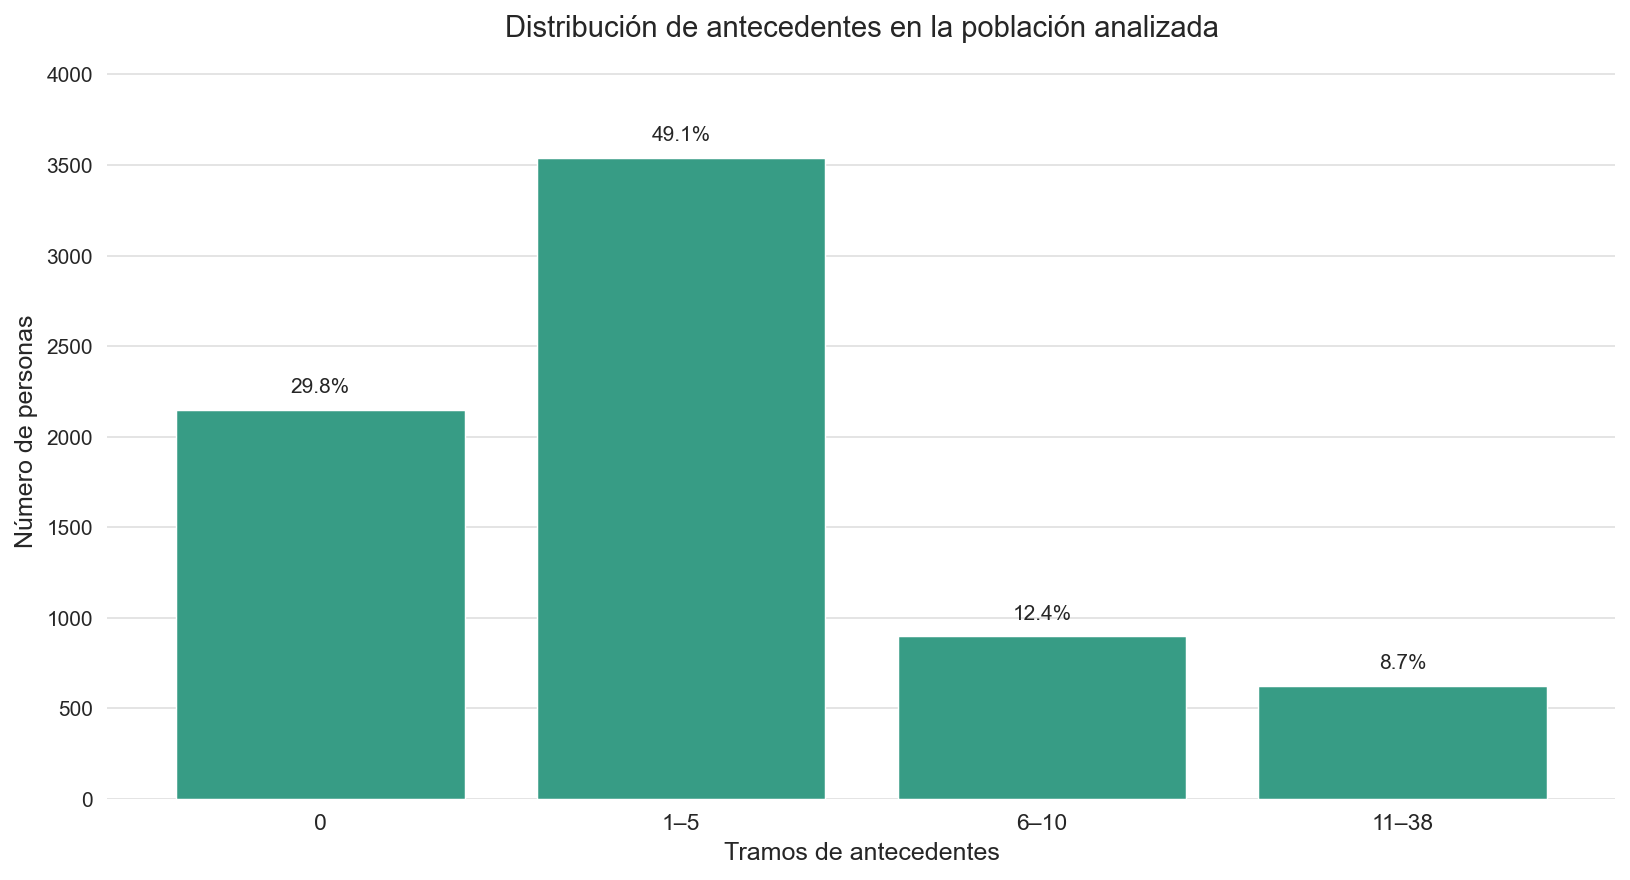

Media: 3.47 | Mediana: 2
0: 29.8%  (2150 personas)
1–5: 49.1%  (3540 personas)
6–10: 12.4%  (898 personas)
11–38: 8.7%  (626 personas)


In [87]:
# Grafico de barras para ver el comportamiento delictivo de la muestra analizada---
col = 'num_antecedentes_totales'   
bins = [-0.5, 0.5, 5.5, 10.5, 38.5]
labels = ['0', '1–5', '6–10', '11–38']

# Serie numérica y tramos
s = pd.to_numeric(df_twoyears[col], errors='coerce')
tramos = pd.cut(s, bins=bins, labels=labels, include_lowest=True)

# Tabla de conteos y %
tabla = tramos.value_counts().reindex(labels).rename('conteos').to_frame()
tabla['%'] = (tabla['conteos'] / tabla['conteos'].sum() * 100).round(1)

# --- Estilo y figura (estático, 16:9) ---
fig, ax = plt.subplots(figsize=(11, 6), dpi=150)  # ideal ppt/docx

# Color suave + contorno blanco para consistencia visual
bars = ax.bar(
    tabla.index,
    tabla['conteos'],
    color="#379C85",          
    edgecolor='white',
    linewidth=0.7
)

# Título y ejes
ax.set_title('Distribución de antecedentes en la población analizada', fontsize=14, pad=12)
ax.set_xlabel('Tramos de antecedentes', fontsize=12)
ax.set_ylabel('Número de personas', fontsize=12)

# Cuadrícula y fondo
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='grey', linestyle='-', linewidth=0.2)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Margen superior para etiquetas
ymax = tabla['conteos'].max()
ax.set_ylim(0, ymax * 1.15)

# Etiquetas de porcentaje encima de cada barra (formato 1 decimal)
for rect, pct in zip(bars, tabla['%']):
    ax.text(
        rect.get_x() + rect.get_width()/2,
        rect.get_height() + ymax*0.02,
        f'{pct}%',
        ha='center', va='bottom', fontsize=10
    )

# (Opcional) Si quieres mostrar también el conteo en la barra, descomenta:
# for rect, cnt in zip(bars, tabla['conteos']):
#     ax.text(rect.get_x() + rect.get_width()/2,
#             rect.get_height() - ymax*0.03,
#             f'{cnt}', ha='center', va='top', fontsize=9, color='#0d47a1')

plt.xticks(fontsize=11)
plt.tight_layout()

# Guardado listo para informe/ppt (PNG y vectorial)
# fig.savefig('eda_antecedentes_tramos.png', dpi=300, bbox_inches='tight')
# fig.savefig('eda_antecedentes_tramos.svg', bbox_inches='tight')

plt.show()

# (Opcional) Resumen para bullets
media, mediana = s.mean(), s.median()
print(f"Media: {media:.2f} | Mediana: {mediana:.0f}")
for tramo in labels:
    c, p = int(tabla.loc[tramo, 'conteos']), tabla.loc[tramo, '%']
    print(f"{tramo}: {p}%  ({c} personas)")

**INSIGHTS SOBRE ESTOS DATOS**


- **Género: Fuerte Subrepresentación Femenina**

    - Hombres: 5,819 (80.7%) | Mujeres: 1,395 (19.3%).
    - Riesgo: Cualquier modelo predictivo estará optimizado para patrones masculinos.
    - Implicación: Las predicciones para mujeres tendrán menor confiabilidad estadística.


- **Etnia: Representación Extremadamente Desigual**

    - Grupos mayoritarios: African-American (51%) y Caucasian (34%).
    - Grupos minoritarios críticos:
        - Asian: 32 casos (0.4%).
        - Native American: 18 casos (0.2%).
        - Hispanic: 637 casos (9%).

- **Edad: Dataset concentrado en adultos de 25 a 45 años**

    - 25–45 años: es el grupo más numeroso, con 4.109 personas (la mayoría del dataset).
    - Mayores de 45 años: 1.576 personas.
    - Menores de 25 años: 1.529 personas.

- **Riesgo COMPAS: la mayoría son evaluados con riesgo bajo**
    - Low (bajo): 3.897 personas, es la categoría más frecuente.
    - Medium (medio): 1.914 personas.
    - High (alto): 1.403 personas.

- **Perfil delictivo de la muestra**
    - 1 de cada 3 personas evaluadas por COMPAS no tiene antecedentes previos (29,8 %).
    - La mitad de la población (49,1 %) presenta entre 1 y 5 antecedentes, lo que indica historiales delictivos leves o moderados.
    - Solo el 21 % acumula más de 5 antecedentes, de los cuales 8,7 % supera los 10.
    - La distribución muestra una alta concentración en perfiles con bajo historial, pero también una minoría reincidente crónica que eleva la media general.



---

<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
- • • • •
</div>

# **7. ANÁLISIS DEMOGRÁFICO DEL DATASET**

**Objetivo:** observar cómo varían el *score* y la reincidencia real entre grupos demográficos. Como grupos demográficos nos centramos en los tres grupos indicados para nuestro análisis: rango de edad, género y etnia.

---

## **7.1 COMPARACIÓN DEL TAMAÑO DE GRUPOS DEMOGRÁFICOS**

Queremos tener una imagen clara y compacta de todos los grupos así que generamos esta gráfico donde podemos ver el alcance en representación de todos ellos en una misma visualización. 

In [58]:
# Comparar en un solo gráfico la distribución por grupos
# Preparar datos en formato largo
categorias = ['etnia', 'genero', 'rango_edad']
df_long = pd.DataFrame()

for var in categorias:
    conteos = df_twoyears[var].value_counts().reset_index()
    conteos.columns = ['categoria', 'conteo']
    conteos['variable'] = var
    df_long = pd.concat([df_long, conteos], ignore_index=True)

# Gráfico de barras superpuestas
fig = px.bar(
    df_long,
    x='categoria',
    y='conteo',
    color='variable',
    barmode='group',  # barras lado a lado (puedes cambiar a 'stack' si quieres apilado)
    title='Comparación del tamaño de grupos demográficos',
    text='conteo'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Categoría',
    yaxis_title='Número de personas',
    legend_title='Variable'
)

fig.show()


Es difícil no identificar la variabilidad que hay entre grupos como "Asian", "Native American" y "Female". Si tenemos en cuenta nuestro objetivo con este dataset en relación a entrenar un modelo de predicción con estos datos tenemos que tener en cuenta:

1. **Perpetuación de Sesgos Sistémicos**

- El modelo amplificará los patrones del sistema judicial actual.
- Predicciones menos precisas para grupos subrepresentados.
- Falsos positivos/negativos desproporcionados en minorías.

2.  **Validez Científica Comprometida**

- No generalizable a poblaciones con demografías diferentes.
- Conclusiones sobre reincidencia sesgadas hacia hombres african-american.
- Intervalos de predicción poco confiables para mujeres y minorías étnicas.

---


---

## **7.2 ANÁLISIS EXPLORATORIO DE LA PUNTUACIÓN DE COMPAS**

### **7.2.1 BOXPLOTS DE RESULTADO POR ETNIA, GÉNERO Y EDAD**

In [59]:
# Boxplot de resultado_compas por etnia
prop.graficar_boxplot_bivariable_px(df_twoyears, 'resultado_compas', 'etnia')


**Insights principales**

- African-American

    - La mediana (línea central de la caja) está claramente más alta que la de Caucasian, Hispanic y Other.

    - Esto significa que, en promedio, reciben puntuaciones de riesgo más altas.

    - La caja es más grande → más variabilidad en las puntuaciones.


- Caucasian e Hispanic

    - Sus medianas son más bajas (aprox. 3–4), indicando que COMPAS tiende a asignarles riesgos más bajos.

    - La distribución es más concentrada que en African-American.


- Other y Asian

    - Ambas tienen puntuaciones bastante bajas, con medianas cercanas a 2–3.

    - Visualmente, COMPAS los considera menos riesgosos en general.


- Native American

    - Aunque es una muestra muy pequeña, destaca porque la caja está bastante alta (mediana aprox. 6–7).

    - Esto sugiere que COMPAS les asigna riesgos relativamente altos, pero debemos ser cautos porque apenas hay 18 casos en los datos.

⚠️Este es un primer indicio de posible sesgo, que habrá que contrastar con la reincidencia real para confirmar si COMPAS “exagera” el riesgo en ciertos grupos.

In [60]:
# Boxplot de resultado_compas por genero
prop.graficar_boxplot_bivariable_px(df_twoyears, 'resultado_compas', 'genero')

**Insights principales**

COMPAS no muestra una diferencia tan marcada entre géneros como la que vimos entre etnias. Ambos tiene una media de 4. 

Aun así, parece que a los hombres se les asignan algo más de puntuaciones altas, lo cual habrá que confirmar con medias y con la reincidencia real.

👉 Para analizar posible sesgo de género, el siguiente paso sería comparar:

Si los hombres realmente reinciden más o menos que las mujeres.

Si COMPAS sobrestima el riesgo en alguno de los dos grupos.

In [61]:
# Boxplot de resultado_compas por rango_edad
prop.graficar_boxplot_bivariable_px(df_twoyears, 'resultado_compas', 'rango_edad')


### **Insights principales**

- **Menores de 25 años (Less than 25)**

    - La mediana está más alta, alrededor de 6.

    - Esto indica que COMPAS suele asignar a los jóvenes puntuaciones de riesgo más altas.

    - Además, su caja es amplia, mostrando mucha variabilidad.


- **Entre 25 y 45 años**

    - La mediana está en torno a 4.

    - Representan un grupo intermedio: reciben puntuaciones medias, ni tan altas como los más jóvenes ni tan bajas como los mayores de 45.


- **Mayores de 45 años (Greater than 45)**

    - La mediana está claramente más baja (aprox. 2).

    - COMPAS considera que los mayores tienen riesgo bajo de reincidencia.

En este histograma con dos variables queremos saber qué relación tiene el resultado de Compas con la edad:

In [62]:

prop.graficar_histograma_bivariable_px(df_twoyears, 'edad', variable_categorica='resultado_compas_grado', bins=20, show_mean_median=True)

En este histograma con dos variables queremos saber qué relación tiene el resultado de Compas con la edad

### **Insights principales**

- **Edad media y mediana**

    - La mediana de edad es ~31 años (mitad de la población es más joven, mitad más mayor).

    - La media es algo mayor, ~35 años → hay más personas mayores que estiran el promedio hacia arriba.


- **Categorías de riesgo y edad**

    - Riesgo alto (High, en naranja) aparece sobre todo en los más jóvenes (20–30 años).

    - Riesgo medio (Medium, en azul) también se concentra en edades jóvenes-adultas, pero menos que el alto.

    - Riesgo bajo (Low, en verde) domina en edades más avanzadas (a partir de los 35–40 años hacia arriba).


- **Tendencia general**

    - A menor edad, mayor probabilidad de recibir puntuaciones más altas (High o Medium).

    - A mayor edad, casi todos acaban siendo clasificados como Low.

---

### **7.2.2 NIVELES DE RIESGO POR GRUPO**

In [63]:
# Media por etnia
df_mean = df_twoyears.groupby('etnia')['resultado_compas'].mean().reset_index()
fig = px.bar(df_mean, x='etnia', y='resultado_compas', title='Riesgo medio por etnia')
fig.show()


<div style="background-color:#d1ecf1; padding:10px; border-left:4px solid #17a2b8; margin:10px 0; color:#2c3e50;">
<strong>ℹ️ Información:</strong> En este gráfico se tiene en cuenta la muestra</div>

In [64]:
# Media por rango_edad
df_mean = df_twoyears.groupby('rango_edad')['resultado_compas'].mean().reset_index()
fig = px.bar(df_mean, x='rango_edad', y='resultado_compas', title='Riesgo medio por rango de edad')
fig.show()



### Insights principales
1. **African-American**  
   - Riesgo medio ≈ **5,3–5,4**, claramente más alto que la media de otros grupos grandes (como Caucasian o Hispanic).  

2. **Native American**  
   - Riesgo medio aún mayor, ≈ **6,1**, pero ojo: la muestra es muy pequeña (18 personas), así que los resultados no son tan fiables.  

3. **Caucasian**  
   - Riesgo medio ≈ **3,7**, más bajo que African-American.  

4. **Hispanic**  
   - Riesgo medio ≈ **3,5**, similar al de Caucasian.  

5. **Asian y Other**  
   - Ambos tienen valores medios bajos, ≈ **2,9–3,0**.  
   - Representan los grupos con menor puntuación media de COMPAS.  


### Conclusión visual
- COMPAS asigna puntuaciones de riesgo **sistemáticamente más altas** a African-American (y Native American, aunque con cautela por la muestra pequeña).  
- Otros grupos, como Caucasian e Hispanic, quedan en un nivel intermedio.  
- Asian y Other son considerados de **riesgo bajo** por el sistema.  

👉 Esto **refuerza el indicio de sesgo por etnia**: no todos los grupos parten del mismo “punto de riesgo medio”, lo que plantea dudas sobre la neutralidad del algoritmo.  


---

### **7.2.3 CONTEOS Y PORCENTAJES DEL RESULTADO POR ETNIA**

In [65]:
# Asegura el orden Low–Medium–High
orden_riesgo = ['Low', 'Medium', 'High']
df_plot = df_twoyears.copy()
df_plot['resultado_compas_grado'] = pd.Categorical(
    df_plot['resultado_compas_grado'],
    categories=orden_riesgo,
    ordered=True
)

# 1) Barras apiladas por CONTEO
fig_counts = px.histogram(
    df_plot,
    x='etnia',
    color='resultado_compas_grado',
    category_orders={'resultado_compas_grado': orden_riesgo},
    barmode='relative',          # apilado
    title='Nivel de riesgo por raza (conteos)'
)
fig_counts.update_layout(
    xaxis_title='Raza',
    yaxis_title='Número de personas',
    legend_title='Riesgo COMPAS'
)
fig_counts.show()

# 2) Barras apiladas por PORCENTAJE (normalizado por raza)
tabla_pct = (
    pd.crosstab(df_plot['etnia'], df_plot['resultado_compas_grado'], normalize='index')
    .reindex(columns=orden_riesgo)
    .reset_index()
)
tabla_pct_long = tabla_pct.melt(id_vars='etnia', var_name='resultado_compas_grado', value_name='porcentaje')

fig_pct = px.bar(
    tabla_pct_long,
    x='etnia',
    y='porcentaje',
    color='resultado_compas_grado',
    category_orders={'resultado_compas_grado': orden_riesgo},
    barmode='relative',          # apilado
    title='Nivel de riesgo por raza (porcentaje dentro de cada raza)',
    text='porcentaje'
)
fig_pct.update_traces(texttemplate='%{text:.1%}', textposition='inside')
fig_pct.update_layout(
    xaxis_title='Raza',
    yaxis_title='Porcentaje',
    legend_title='Riesgo COMPAS',
    yaxis_tickformat=',.0%'      # eje Y en %
)
fig_pct.show()


## Nivel de riesgo COMPAS por raza

### Insights principales

1. **Distribución absoluta (conteos)**
   - African-American y Caucasian son los grupos más numerosos en la base de datos.
   - African-American tiene una proporción importante de personas clasificadas como **Medium** y **High**, además de Low.
   - Caucasian tiene mayoría en **Low**, y menos casos en Medium y High.
   - Hispanic también concentra la mayoría en Low, con menor presencia en Medium y High.
   - Asian y Other son grupos muy pequeños y dominan las categorías de **Low**.
   - Native American es muy reducido en número, pero llama la atención porque se distribuye bastante entre los tres niveles.

2. **Distribución relativa (porcentajes dentro de cada grupo)**
   - **African-American**: solo un **41% Low**, mientras que un **31% Medium** y un **28% High**.  
     → Es el grupo con mayor peso en categorías de riesgo alto.
   - **Caucasian**: un **65% Low** y apenas un **11% High**.  
     → Claramente más favorecido por COMPAS.
   - **Hispanic**: un **70% Low**, un **19% Medium** y un **10% High**.  
     → Perfil similar a Caucasian, con menos casos de riesgo alto.
   - **Asian** y **Other**: más del **75% Low**, apenas un pequeño porcentaje en Medium y casi nada en High.  
     → COMPAS los clasifica como de bajo riesgo en su gran mayoría.
   - **Native American**: 33% en cada categoría (Low, Medium, High).  
     → Reparto llamativo, aunque poco fiable por el tamaño muy reducido de la muestra.

<div align="center">
<p>- - -</p>
</div>

### Conclusión
- COMPAS **no distribuye el riesgo de manera uniforme entre razas**.
- African-American aparece con mucha más frecuencia en **riesgo medio y alto** que otros grupos.  
- Caucasian, Hispanic, Asian y Other son mayoritariamente clasificados como **riesgo bajo**.  
- Esto refuerza la sospecha de un **sesgo étnico en la asignación de puntuaciones**.


---

---

## **7.3 PROPORCIÓN DE REINCIDENCIA POR GRUPO**

In [66]:
# Variables demográficas 
variables = ['etnia', 'genero', 'rango_edad']

for var in variables:
    tabla = pd.crosstab(df_twoyears[var], df_twoyears['reincide'], normalize='index').round(3)
    tabla.columns = ['No reincide', 'Reincide']
    print(f"\nProporción de reincidencia por {var}:\n")
    display(tabla)

    # Gráfico de barras apiladas
    tabla_reset = tabla.reset_index()
    tabla_long = tabla_reset.melt(id_vars=var, value_name='proporcion', var_name='Reincidencia')
    fig = px.bar(
        tabla_long,
        x=var, y='proporcion', color='Reincidencia',
        barmode='relative', text='proporcion',
        title=f"Proporción de reincidencia por {var}"
    )
    fig.update_traces(texttemplate='%{text:.1%}', textposition='inside')
    fig.show()



Proporción de reincidencia por etnia:



,No reincide,Reincide
etnia,,
African-American,0.486,0.514
Asian,0.719,0.281
Caucasian,0.606,0.394
Hispanic,0.636,0.364
Native American,0.444,0.556
Other,0.647,0.353



Proporción de reincidencia por genero:



,No reincide,Reincide
genero,,
Female,0.643,0.357
Male,0.527,0.473



Proporción de reincidencia por rango_edad:



,No reincide,Reincide
rango_edad,,
25 - 45,0.540,0.460
Greater than 45,0.684,0.316
Less than 25,0.435,0.565


### **INSIGHTS: Proporción de reincidencia por etnia, género y edad**

### Por etnia
- **African-American**: 51% reinciden, una de las tasas más altas.  
- **Native American**: 56% reinciden (muestra muy pequeña, poco fiable).  
- **Asian**: 28% reinciden, la más baja.  
- **Caucasian**: 39% reinciden.  
- **Hispanic**: 36% reinciden.  
- **Other**: 35% reinciden.  

👉 Diferencias claras: African-American y Native American reinciden más, Asian mucho menos.

<div align="center">
<p>- - - -</p>
</div>

### Por género
- **Male**: 47% reinciden.  
- **Female**: 36% reinciden.  

👉 Los hombres reinciden más que las mujeres.

<div align="center">
<p>- - - -</p>
</div>

### Por rango de edad
- **< 25 años**: 57% reinciden, la tasa más alta.  
- **25–45 años**: 46% reinciden.  
- **> 45 años**: 32% reinciden, la más baja.  

👉 La reincidencia disminuye con la edad: cuanto más joven, mayor probabilidad de reincidir.


---

## **7.4 PERFIL DELICTIVO POR ÉTNIA Y GÉNERO**

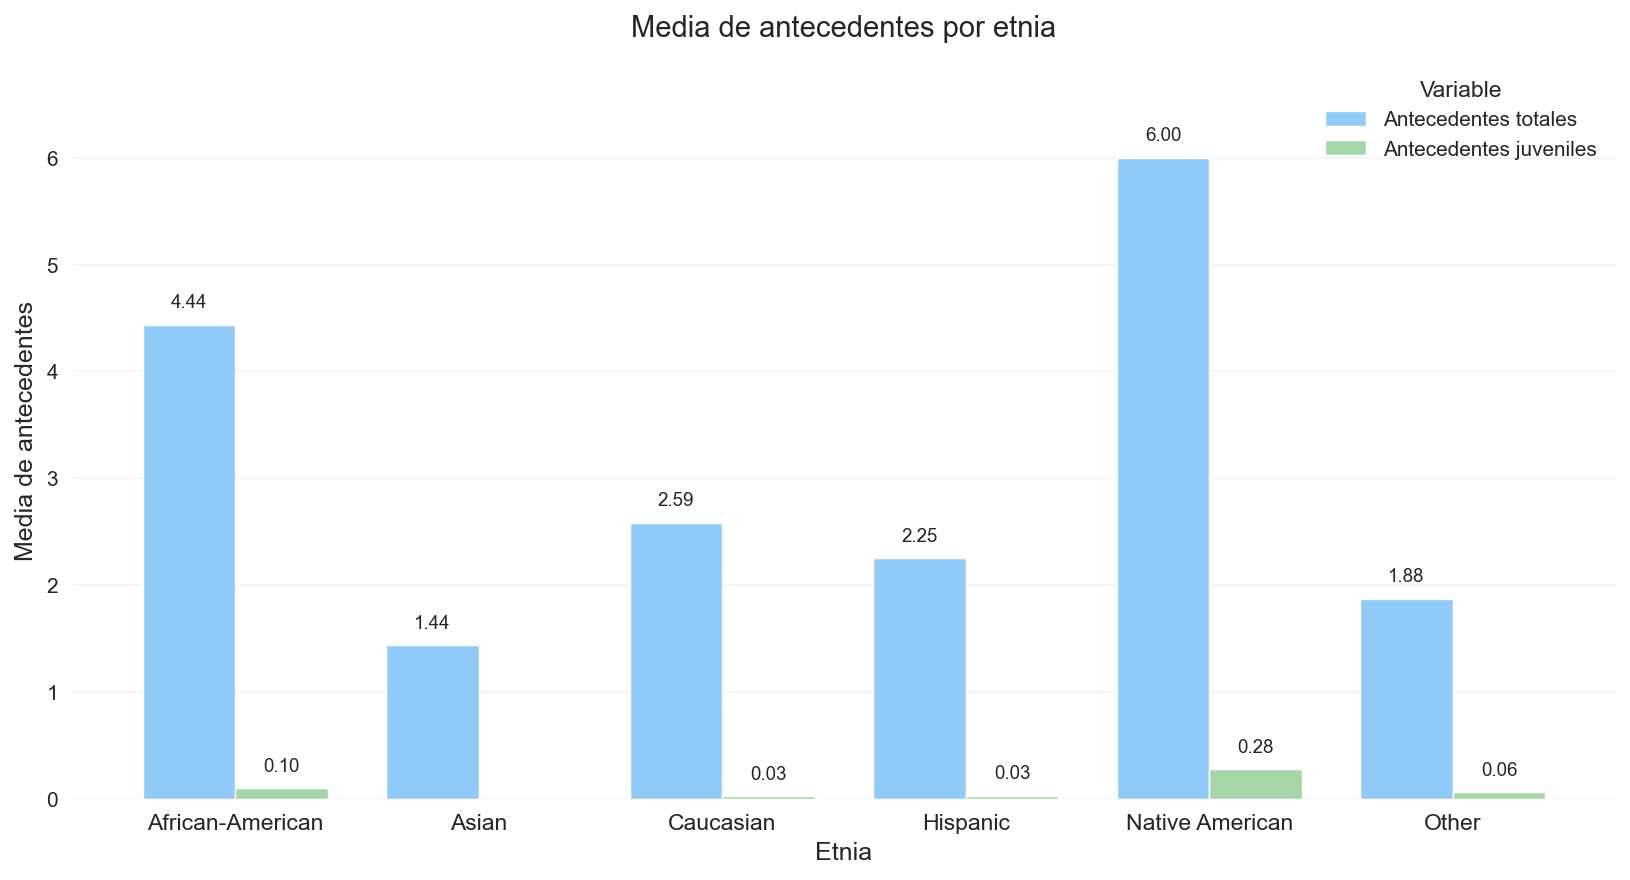

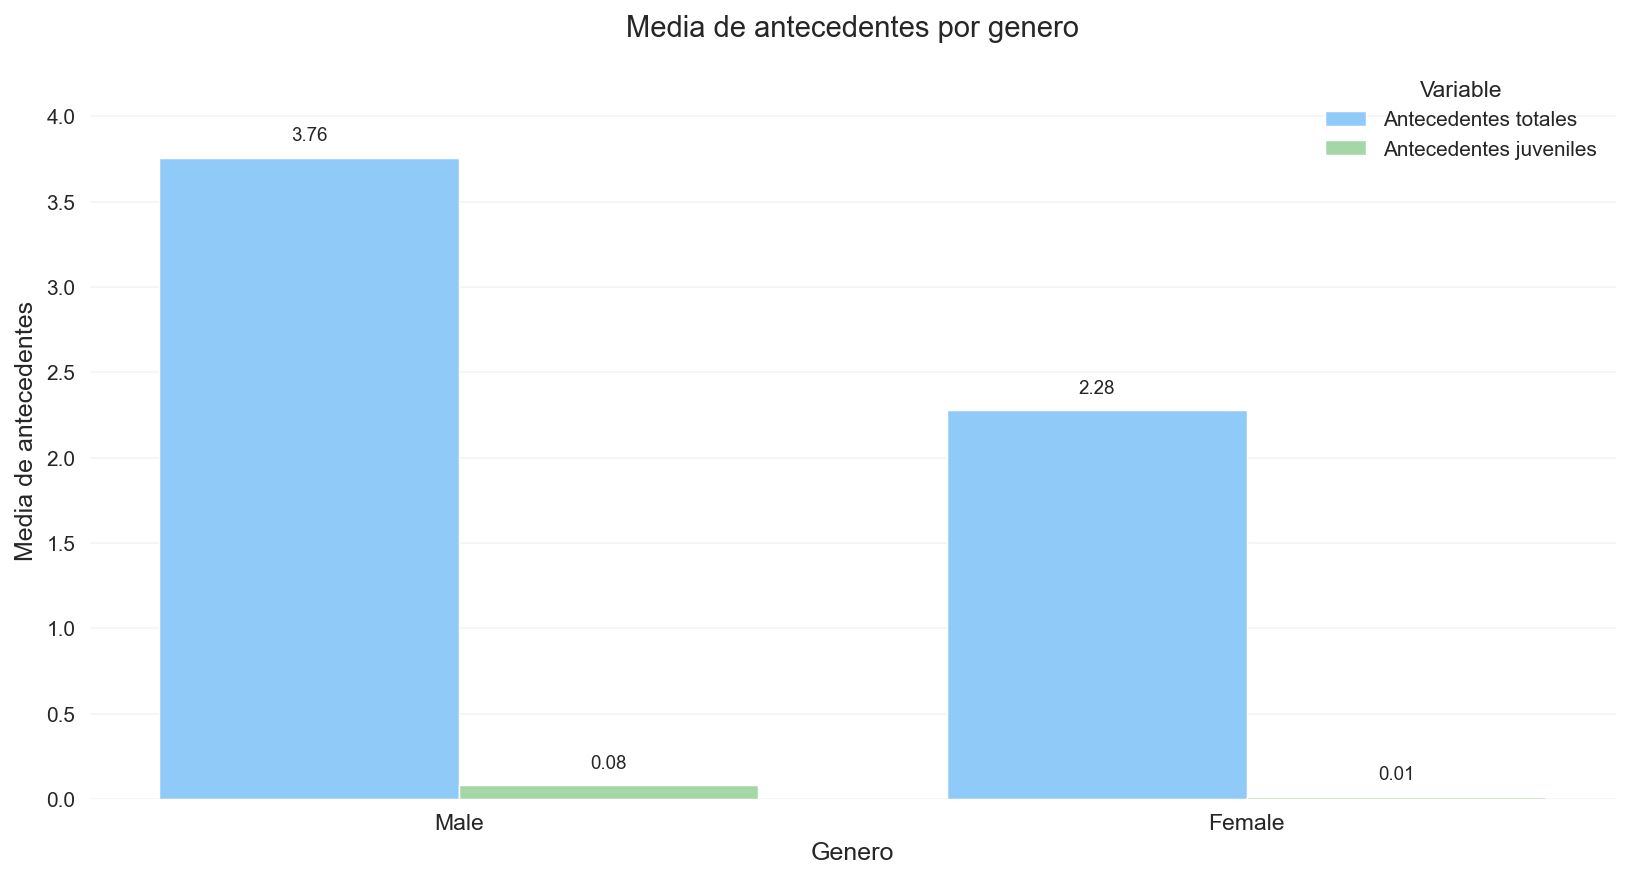

In [98]:

# Objetivo: conocer el perfil de antecedentes de la muestra dependiendo de género y etnia
# ================== Configuración ==================
vars_num = ['num_antecedentes_totales', 'num_anteced_juv']  # columnas numéricas
grupos = ['etnia', 'genero']                                 # dimensiones
PALETA = ['#90caf9', '#a5d6a7']                              # azul suave, verde menta
AGG = 'mean'  # 'mean' o 'median'

# Asegurar tipos numéricos
df_aux = df_twoyears.copy()
for v in vars_num:
    df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')

# Orden opcional para 'genero'
if 'genero' in df_aux.columns:
    df_aux['genero'] = pd.Categorical(df_aux['genero'], categories=['Male', 'Female'], ordered=True)

def _agg_tabla(grupo_col, agg='mean'):
    if agg == 'median':
        tabla = df_aux.groupby(grupo_col, observed=True)[vars_num].median(numeric_only=True)
        titulo_stat = 'Mediana'
    else:
        tabla = df_aux.groupby(grupo_col, observed=True)[vars_num].mean(numeric_only=True)
        titulo_stat = 'Media'
    return tabla.sort_index(), titulo_stat

def plot_barras_dobles(tabla, grupo_col, titulo_stat):
    idx = np.arange(len(tabla))
    width = 0.38

    fig, ax = plt.subplots(figsize=(11, 6), dpi=150)  # formato 16:9
    b1 = ax.bar(idx - width/2, tabla[vars_num[0]], width,
                label='Antecedentes totales', color=PALETA[0],
                edgecolor='white', linewidth=0.7)
    b2 = ax.bar(idx + width/2, tabla[vars_num[1]], width,
                label='Antecedentes juveniles', color=PALETA[1],
                edgecolor='white', linewidth=0.7)

    ymax = float(np.nanmax([tabla[vars_num[0]].max(), tabla[vars_num[1]].max()]))
    ax.set_ylim(0, ymax * 1.15)

    # Etiquetas de valor encima de cada barra
    for bars in (b1, b2):
        for rect in bars:
            h = rect.get_height()
            if np.isfinite(h) and h > 0:
                ax.text(rect.get_x() + rect.get_width()/2, h + ymax*0.02,
                        f'{h:.2f}', ha='center', va='bottom', fontsize=9)

    # Estética consistente con el notebook
    ax.set_title(f'{titulo_stat} de antecedentes por {grupo_col}', fontsize=14, pad=12)
    ax.set_xlabel(grupo_col.capitalize(), fontsize=12)
    ax.set_ylabel(f'{titulo_stat} de antecedentes', fontsize=12)
    ax.set_xticks(idx, tabla.index.astype(str), rotation=0, fontsize=11)
    ax.legend(frameon=False, fontsize=10, title='Variable', title_fontsize=11, loc='upper right')
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='lightgrey', linestyle='-', linewidth=0.2)
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()



# ================== Ejecutar ==================
for g in grupos:
    tabla, titulo_stat = _agg_tabla(g, agg=AGG)
    plot_barras_dobles(tabla, g, titulo_stat)





---

## **CONCLUSIONES**


### 1. **Comparación de tamaños de población**

- En el dataset vemos que no todos los grupos tienen el mismo número de personas.

- Algunos grupos (por ejemplo, según etnia) son mucho más grandes que otros.

- Esto es importante porque si un grupo es muy pequeño, cualquier porcentaje o resultado puede verse “exagerado” por el poco número de casos.

💡 Idea para el análisis de sesgo: necesitamos tener cuidado al comparar grupos con tamaños muy distintos, porque un grupo grande domina los resultados y uno pequeño puede dar porcentajes poco fiables.

| Grupo            | Número de personas |
|------------------|---------------------|
| African-American | 3.696               |
| Caucasian        | 2.454               |
| Hispanic         | 637                 |
| Other            | 377                 |
| Asian            | 32                  |
| Native American  | 18                  |


👉 Claramente, los grupos son muy desiguales. Los dos grandes son African-American y Caucasian, mientras que otros como Asian o Native American apenas tienen casos.
Esto significa que los porcentajes de los grupos pequeños pueden ser poco fiables (se distorsionan con facilidad).

<div align="center">
<p>.......</p>
</div>

### 2. **Puntuaciones COMPAS**

- COMPAS da una puntuación de riesgo de 1 a 10.

- Cuando miramos las medias y distribuciones, notamos que algunos grupos tienden a tener puntuaciones más altas que otros, incluso antes de mirar si reinciden o no.

- Esto ya nos da una pista: el sistema puede estar “viendo” a ciertos grupos como más riesgosos, aunque luego no necesariamente reincidan más.

💡 Idea para el análisis de sesgo: si COMPAS asigna puntuaciones más altas sistemáticamente a un grupo, habría que ver si esa diferencia se justifica por los datos reales o si es un sesgo.

Puntuaciones COMPAS (media por grupo)

| Grupo            | Puntuación COMPAS media |
|------------------|--------------------------|
| African-American | 5,37                     |
| Caucasian        | 3,74                     |
| Hispanic         | 3,46                     |
| Other            | 2,95                     |
| Asian            | 2,94                     |
| Native American  | 6,17 *(muestra muy pequeña: 18 casos)* |


👉 COMPAS tiende a dar puntuaciones más altas a African-American y Native American, y más bajas a otros grupos como Asian, Other e Hispanic.
Esto ya sugiere una diferencia en cómo el sistema valora el “riesgo”.

<div align="center">
<p>.......</p>
</div>

### 3. **Proporciones de reincidencia por grupo**

- Cuando vemos quiénes reinciden realmente, encontramos que las tasas de reincidencia también varían entre grupos.

Por ejemplo, un grupo puede tener un 50% de reincidencia y otro un 30%.

Pero la clave está en comparar eso con lo que COMPAS había predicho: ¿le está poniendo más riesgo a un grupo incluso cuando reincide menos?

💡 Idea para el análisis de sesgo: la comparación entre “riesgo predicho” y “reincidencia real” por grupo es lo que nos permitirá decir si COMPAS trata de manera justa a todos o si sobreestima el riesgo en algunos.

Proporción de reincidencia real (a 2 años)

| Grupo            | Reincidencia (2 años) |
|------------------|------------------------|
| African-American | 51%                    |
| Caucasian        | 39%                    |
| Hispanic         | 36%                    |
| Other            | 35%                    |
| Asian            | 28%                    |
| Native American  | 56% *(muestra muy pequeña)* |


👉 En la realidad, African-American y Native American reinciden más (según estos datos), mientras que Asian y Other reinciden menos.
Sin embargo, hay que preguntarse: ¿COMPAS exagera esas diferencias? ¿O realmente predice bien?

### 4. **Perfil delictivo por etnia y género**

**Media de antecedentes por etnia**

- Las personas African-American presentan la media más alta de antecedentes totales (4.44), seguidas por Native American (6.00), aunque este último grupo tiene muy pocos casos, por lo que su valor debe interpretarse con cautela.

- Las etnias Caucasian (2.59) y Hispanic (2.25) muestran medias de antecedentes significativamente más bajas.

- Los grupos Asian (1.44) y Other (1.88) presentan los historiales delictivos más reducidos.

- En cuanto a antecedentes juveniles, las diferencias son pequeñas: en todos los grupos los valores son muy bajos (< 0.3), aunque ligeramente superiores en Native American (0.28) y African-American (0.10).

**Media de antecedentes por género**

- Los hombres tienen una media de 3.76 antecedentes totales, muy superior a la de las mujeres (2.28).

- Los antecedentes juveniles también muestran una diferencia: los hombres promedian 0.08, mientras que las mujeres apenas 0.01.

- Esto confirma un patrón de mayor reincidencia y experiencia delictiva previa en varones, coherente con su sobrerrepresentación en el dataset.

---



<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
 • • • •
</div>

# **8. COMPARACIÓN ENTRE RIESGO Y REALIDAD**

**OBJETIVO:** Evaluar si Compas asigna riesgo acorde a la reincidencia real.

**¿Qué porcentaje acierta COMPAS en la reincidencia real ?**

Aquí miramos los cruces entre riesgo positivo y reincidencia positiva, y riesgo negativo y reincidencia negativa. 

In [67]:
# Acierto global del modelo COMPAS (decile_score y score_text)
"""Calcula el porcentaje de aciertos del modelo COMPAS en predecir la reincidencia"""

acierto = (
    (df_twoyears["reincide"] & (df_twoyears["resultado_compas"] >= 5)) |
    (~df_twoyears["reincide"] & (df_twoyears["resultado_compas"] < 5))
).mean() * 100


acierto_grado = (
    (df_twoyears["reincide"] & df_twoyears["resultado_compas_grado"].isin(["Medium","High"])) |
    (~df_twoyears["reincide"] & (df_twoyears["resultado_compas_grado"] == "Low"))
).mean() * 100

print(f"Acierto global : {acierto:.2f}%")

Acierto global : 65.37%




- **8.1 Distribución condicional de reincidencia por score: Visualizamos la proporción de reincidencia real por riesgo (Low,Medium,High)**

    *¿A mayor score de COMPAS, realmente sube la reincidencia?*

- **8.2 Comparación riesgo medio vs. reincidencia real por grupos (compare_risk_vs_recid)**
    
    *¿Los grupos a los que COMPAS da más riesgo son los que realmente reinciden más?*


- **8.3 Correlación de Spearman**

    *¿Existe una relación de orden entre score y reincidencia?*

    - 8.3.1 Global
    - 8.3.2 Por grupos

- **8.4 Conclusiones** 


**Comparamos el promedio del decil  con la tasa empírica de reincidencia (0–100%) por grupo para ver si el sistema asigna más riesgo donde realmente hay más reincidencia. No asumimos que el decil sea una probabilidad; lo usamos como índice ordinal y evaluamos su consistencia con la realidad observada.**

In [68]:
# Creaciones de funciones para visualizaciones: 

def plot_histograms(df, numeric_vars, bins=20):
    """Histograma con media y mediana reutilizando la librería propia cuando sea posible."""
    for var in numeric_vars:
        try:
            prop.graficar_histograma_px(df, var)
        except Exception as e:
            print(f"[Aviso] No se pudo graficar histograma de {var}: {e}")


def plot_bars(df, cat_vars):
    for var in cat_vars:
        try:
            prop.graficar_barras_px(df, var)
        except Exception as e:
            print(f"[Aviso] No se pudo graficar barras de {var}: {e}")


def boxplots_by(df, y_var, group_vars):
    for g in group_vars:
        try:
            prop.graficar_boxplot_bivariable_px(df, y_var, g)
        except Exception as e:
            print(f"[Aviso] No se pudo graficar boxplot {y_var} por {g}: {e}")


def crosstab_stacked_bar(df, index_var, col_var, normalize='index', title=None):
    """Crosstab + barras apiladas (%)."""
    tabla = pd.crosstab(df[index_var], df[col_var], normalize=normalize).round(3)
    tabla_reset = tabla.reset_index().melt(id_vars=index_var, var_name=str(col_var), value_name='proporcion')
    fig = px.bar(tabla_reset, x=index_var, y='proporcion', color=str(col_var),
                 barmode='relative', text='proporcion', title=title or f"Proporciones de {col_var} por {index_var}")
    fig.update_traces(texttemplate='%{text:.1%}', textposition='inside')
    fig.update_layout(yaxis_tickformat=',.0%')
    fig.show()
    return tabla


def compare_risk_vs_recid(df, group_var):
    """Riesgo medio (resultado_compas) vs tasa real de reincidencia (reincide) por grupo."""
    riesgo = df.groupby(group_var)['resultado_compas'].mean().reset_index().rename(columns={'resultado_compas':'riesgo_medio'})
    real = df.groupby(group_var)['reincide'].mean().reset_index().rename(columns={'reincide':'reincidencia_real'})
    comp = pd.merge(riesgo, real, on=group_var)
    fig = px.bar(comp.melt(id_vars=group_var, value_vars=['riesgo_medio','reincidencia_real']),
                 x=group_var, y='value', color='variable', barmode='group',
                 title=f'Riesgo medio vs Reincidencia real por {group_var}')
    fig.update_layout(yaxis_tickformat=',.2f')
    fig.show()
    return comp

##  **8.1 DISTRIBUCIÓN CONDICIONAL DE REINCIDENCIA POR SCORE**

O lo que es lo mismo, reincidencia dentro de cada nivel de riesgo de Compas. Así podemos saber como se distribuye 

In [69]:
# 8.1 Reincidencia dentro de cada nivel de riesgo COMPAS (Low/Medium/High)
"""Muestra el porcentaje de reincidencia dentro de cada nivel de riesgo COMPAS."""
if all(c in df_twoyears.columns for c in ['resultado_compas_grado','reincide']):
    _ = crosstab_stacked_bar(df_twoyears, 'resultado_compas_grado', 'reincide',
                             normalize='index',
                             title='Reincidencia dentro de cada nivel de riesgo COMPAS')



- Este gráfico apilado nos muestra el porcentaje de reincidencia y no reincidencia según el score dado.
- Esto evalúa un aspecto de calibración por tramos: si el sistema asigna más High a personas que efectivamente reinciden más.
- Por ejemplo: el 71.3 % de las personas que les asignaron el riesgo "High" efectivamente reincidieron en el tiempo de estudio. 
- Esto indica, que en terminos generales, los individuos que son asignados el grado más alto ("high") presentan mayor probabilidad de reincidencia, demostrando una coherencia esperada.
- Sin embargo, seguimos observando que dentro del grado "Low" hay un porcentaje significativo de reincidencia y en el grado "High" hay un porcentaje significativo que NO reincide, lo cual muestra una limitación en la precisión del sistema COMPAS.

---

## **8.2 COMPARACIÓN DEL RIESGO MEDIO VS LA TASA REAL DE REINCIDENCIA POR GRUPO**

**Definiciones**

- **Riesgo medio**: reescalado a 0–1. Promedio del score COMPAS numérico (resultado_compas, de 1 a 10) dentro de un grupo. Es un índice ordinal de riesgo (más alto = mayor riesgo) y no es una probabilidad directa.

- **Reincidencia real**: proporción de personas que sí reinciden dentro de un grupo (media de reincide, donde 1 = reincide, 0 = no).Es una probabilidad empírica (0–1, o 0–100%).
Se muestran ambas barras lado a lado para detectar alineación o desajustes.

---

### **8.2.1 COMPARACIÓN DE LA PUNTUACIÓN PROMEDIO CON LA TASA DE REINCIDENCIA REESCALADO**

**CAMBIOS EN LOS GRÁFICOS PARA MAYOR COMPRENSIÓN** 
“Comparamos el promedio del decil (reescalado a 0–100%) con la tasa empírica de reincidencia (0–100%) por grupo para ver si el sistema asigna más riesgo donde realmente hay más reincidencia. No asumimos que el decil sea una probabilidad; lo usamos como índice ordinal y evaluamos su consistencia con la realidad observada.”

In [70]:
def compare_risk_vs_recid(df, group_var):
    """
    Compara:
      - riesgo_medio_scaled: decil medio (1–10) reescalado a 0–1
      - reincidencia_real: proporción real (0–1)
    por cada valor de group_var (ej. etnia, genero, rango_edad).
    """
    # Riesgo medio (1–10) → 0–1
    riesgo = (
        df.groupby(group_var)['resultado_compas']
          .mean()
          .reset_index()
          .rename(columns={'resultado_compas':'riesgo_medio'})
    )
    riesgo['riesgo_medio_scaled'] = riesgo['riesgo_medio'] / 10.0

    # Reincidencia real (0–1)
    real = (
        df.groupby(group_var)['reincide']
          .mean()
          .reset_index()
          .rename(columns={'reincide':'reincidencia_real'})
    )

    # Merge
    comp = riesgo.merge(real, on=group_var)

    # Gráfico (ambas en %)
    df_long = comp.melt(
        id_vars=group_var,
        value_vars=['riesgo_medio_scaled', 'reincidencia_real'],
        var_name='métrica',
        value_name='valor'
    )
    df_long['métrica'] = df_long['métrica'].map({
        'riesgo_medio_scaled': 'Riesgo medio (escalado)',
        'reincidencia_real': 'Reincidencia real'
    })

    fig = px.bar(
        df_long, x=group_var, y='valor', color='métrica', barmode='group',
        title=f'Riesgo medio (escalado) vs Reincidencia real por {group_var}',
        text='valor'
    )
    fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
    fig.update_layout(yaxis_tickformat=',.0%', yaxis_title='Porcentaje')
    fig.show()

    return comp

# --- Ejecutar por cada variable disponible ---
for g in [c for c in ['etnia','genero','rango_edad'] if c in df_twoyears.columns]:
    print(f"\n=== {g.upper()} ===")
    out = compare_risk_vs_recid(df_twoyears, g)
    display(out.round(3))


=== ETNIA ===


,etnia,riesgo_medio,riesgo_medio_scaled,reincidencia_real
0,African-American,5.369,0.537,0.514
1,Asian,2.938,0.294,0.281
2,Caucasian,3.735,0.374,0.394
3,Hispanic,3.463,0.346,0.364
4,Native American,6.167,0.617,0.556
5,Other,2.950,0.295,0.353



=== GENERO ===


,genero,riesgo_medio,riesgo_medio_scaled,reincidencia_real
0,Female,4.172,0.417,0.357
1,Male,4.590,0.459,0.473



=== RANGO_EDAD ===


,rango_edad,riesgo_medio,riesgo_medio_scaled,reincidencia_real
0,25 - 45,4.600,0.460,0.460
1,Greater than 45,2.918,0.292,0.316
2,Less than 25,5.908,0.591,0.565


**CONCLUSIONES**

**1. LOS GRUPOS CON MAYOR RIESGO MEDIO COMPAS TAMBIÉN MUESTRAN MAYOR TASA REAL DE REINCIDENCIA?**
- GENERO: Se observa una correspondencia adecuada con respecto al riesgo y a la reincidencia con repescto a hombres, lo que no pasa con las mujeres. Asignandoles a ellas un riesgo mayor del que realmente presentan.
- EDAD: Se observa una correspondencia adecuada en términos generales con respecto al riesgo y a la reincidencia, especialmente en el rango de 25 a 45. Sin embargo vemos diferencias en Menos de 25.

    Vemos que los hombres presentan un riesgo más alto y efectivamente reinciden más, y el grupo de edad de 25 años presentan un riesgo más alto y reinciden más también.

- ETNIA: Con African American esto se cumple, demostrando una coherencia esperada. Sin embargo, para grupos como Caucasian y Others, esto no se cumple, reincidiendo más de lo que COMPAS predice. Recordar que hay grupos etnicos con muestras muy pequeñas que no tendremos en cuenta.

**2. ¿EXISTEN GRUPOS EN LOS QUE COMPAS ASIGNA SCORES MAS ALTOS, PERO QUE REALMENTE REINCIDEN MENOS (O AL REVÉS)?**

Sí, especialmente en la variable ETNIA.

COMPAS asigna a African-American un score medio notablemente más alto que a los Caucasian, pero la diferencia real en reincidencia entre estos grupos es menor de lo que sugiere la puntuación. En otras palabras, COMPAS amplifica la brecha de riesgo entre etnias, otorgando a African-American un nivel de riesgo más alto del que refleja la diferencia real en reincidencia respecto a otros grupos.

---

## **8.3 CORRELACIÓN DE SPEARMAN**

**OBJETIVO**

Calcular la correlación de Spearman entre el score COMPAS (resultado_compas) y la reincidencia real (reincide).

Spearman mide la asociación monotónica entre dos variables, sin asumir linealidad.

- Si **ρ > 0**, indica que a mayor score, mayor probabilidad de reincidencia observada.

- Valores cercanos a **0** implican que el score no ordena bien los casos.

**Cómo podríamos haber llegado a usar Spearman sin haberlo dado en clase aunque no lo hayamos visto directamente en el temario, hay pistas claras en la documentación del TFM y en el contexto del proyecto:**

- Requerimiento de correlacionar riesgo y realidad sin asumir distribución normal → Esto sugiere buscar una métrica no paramétrica (Spearman o Kendall Tau).

- El dataset tiene variables ordinales y binarias → Pearson no es óptimo.

---

### **8.3.1 GLOBAL**

In [71]:
# Global
"""Correlación global entre resultado_compas y reincide (Spearman)."""
rho, p = spearmanr(df_twoyears['resultado_compas'], df_twoyears['reincide'])
print(f"Spearman global (resultado_compas vs reincide): rho={rho:.3f}, p={p:.4f}")


Spearman global (resultado_compas vs reincide): rho=0.351, p=0.0000


**Resultados y análisis**

ρ = 0.351
- Correlación positiva, pero moderada-baja.
- Significa que a mayor score COMPAS tiende a haber más reincidencia, pero la relación no es muy fuerte.
- En términos prácticos: COMPAS sí “ordena” algo, pero no de manera precisa.

p = 0.0000
- Estadísticamente significativo.
- La correlación no es casualidad.
- El resultado no se debe al azar, aunque la fuerza de la relación no sea muy alta.

Se calculó la correlación de Spearman entre el score COMPAS y la reincidencia real.
El resultado (ρ = 0.351, p < 0.001) muestra que existe una relación positiva y significativa: a mayor score, mayor probabilidad de reincidencia.
Sin embargo, la fuerza de la correlación es moderada, lo que indica que COMPAS captura parte del riesgo real pero no lo predice con total precisión.

En el contexto judicial, donde se espera que una herramienta de predicción de riesgo tenga una alta capacidad discriminativa, esta correlación resulta insuficiente para justificar su uso como predictor fiable.

---

### **8.3.2 VARIABLES DEMOGRÁFICAS (grupos de estudio)**

In [72]:
# Por grupos demográficos

resultados_spearman = {}

for g in [c for c in ['genero','rango_edad','etnia'] if c in df_twoyears.columns]:
    print(f"\n=== {g.upper()} ===")
    resultados = []
    for val, subset in df_twoyears.groupby(g):
        if subset['reincide'].nunique() > 1:  # evitar grupos sin variación
            rho, p = spearmanr(subset['resultado_compas'], subset['reincide'])
            resultados.append({'Grupo': val, 'rho': round(rho,3), 'p-valor': round(p,4), 'n': len(subset)})
    resultados_spearman[g] = pd.DataFrame(resultados)
    display(resultados_spearman[g])


=== GENERO ===


,Grupo,rho,p-valor,n
0,Female,0.320,0.0,1395
1,Male,0.354,0.0,5819



=== RANGO_EDAD ===


,Grupo,rho,p-valor,n
0,25 - 45,0.333,0.0,4109
1,Greater than 45,0.324,0.0,1576
2,Less than 25,0.255,0.0,1529



=== ETNIA ===


,Grupo,rho,p-valor,n
0,African-American,0.334,0.0000,3696
1,Asian,0.590,0.0004,32
2,Caucasian,0.332,0.0000,2454
3,Hispanic,0.235,0.0000,637
4,Native American,0.623,0.0058,18
5,Other,0.336,0.0000,377


**Resultados Spearman por grupos**

Género

 - Mujeres: ρ = 0.320
 - Hombres: ρ = 0.354
 - 👉 En ambos casos la relación es positiva y significativa: a mayor score, mayor reincidencia. No hay grandes diferencias por género.

Edad

 - <25: ρ = 0.255 → relación positiva pero más débil.
 - 25–45: ρ = 0.333
 - +45: ρ = 0.324
 - 👉 COMPAS refleja la tendencia en todos los grupos de edad, pero en jóvenes la correlación es más baja, es decir, el score predice peor en ese grupo.

Etnia

 - African-American: ρ = 0.334
 - Caucasian: ρ = 0.332
 - Hispanic: ρ = 0.235 → relación más débil.
 - 👉 En general, la relación es positiva y significativa en todas las etnias, pero en hispanos COMPAS captura peor la relación entre score y reincidencia.

En los grupos mayoritarios (African-American y Caucasian) la correlación es positiva y de magnitud moderada-baja, similar a la global. En el grupo Hispanic es todavía más débil (ρ = 0.235), lo que indica peor ordenación del riesgo. Los grupos Asian y Native American presentan correlaciones más altas, pero sus tamaños muestrales son muy reducidos (n = 32 y n = 18, respectivamente), por lo que estas estimaciones deben interpretarse con cautela.

**Conclusión:**

La correlación de Spearman entre el score COMPAS y la reincidencia es positiva y significativa en todos los grupos (p<0.001). Esto indica que, en general, a mayor score mayor probabilidad de reincidir. Sin embargo, la intensidad de la relación varía: en jóvenes (<25) y en el grupo hispano la correlación es más débil, lo que sugiere que COMPAS refleja peor la realidad en estos colectivos, lo que refuerza la hipótesis de un desempeño desigual del algoritmo según características demográficas.



---

### **8.3.3 VISUALIZACIÓN**

In [73]:

def scatter_risk_vs_recid(df, group_var):
    """
    Scatterplot de riesgo medio (escalado) vs reincidencia real por grupo.
    Sirve para visualizar sobre/subestimación frente a la diagonal y=x.
    """
    # Riesgo medio (escalado)
    riesgo = (
        df.groupby(group_var)['resultado_compas']
          .mean()
          .reset_index()
          .rename(columns={'resultado_compas':'riesgo_medio'})
    )
    riesgo['riesgo_medio_scaled'] = riesgo['riesgo_medio'] / 10.0

    # Reincidencia real
    real = (
        df.groupby(group_var)['reincide']
          .mean()
          .reset_index()
          .rename(columns={'reincide':'reincidencia_real'})
    )

    # Merge
    comp = riesgo.merge(real, on=group_var)

    # Scatter
    fig = px.scatter(
        comp, x='riesgo_medio_scaled', y='reincidencia_real', text=group_var,
        title=f"Riesgo medio (escalado) vs Reincidencia real por {group_var}",
        labels={
            'riesgo_medio_scaled': 'Riesgo medio (escala 0-1)',
            'reincidencia_real': 'Reincidencia real (proporción)'
        }
    )
    fig.update_traces(textposition='top center', marker=dict(size=12))
    fig.add_shape(
        type="line", x0=0, y0=0, x1=1, y1=1,
        line=dict(color="Red", width=2, dash="dash")
    )
    fig.show()

# --- Ejecución en orden: genero → rango_edad → etnia ---
for g in [c for c in ['genero', 'rango_edad', 'etnia'] if c in df_twoyears.columns]:
    scatter_risk_vs_recid(df_twoyears, g)


 - En género, se observa si uno de ellos aparece sistemáticamente por encima de la diagonal (sobreestimación) o por debajo (subestimación).
 - En rango de edad, se identifica si ciertos grupos de edad están peor alineados con la diagonal (ej. jóvenes sobreestimados, mayores subestimados).
 - En etnia, se pueden detectar diferencias estructurales: **grupos muy por encima → COMPAS los penaliza más de lo real; por debajo → COMPAS infravalora su reincidencia.**
 - La dispersión respecto a la diagonal es una evidencia visual complementaria a Spearman: cuanto más alejados los puntos, más pobre la calibración entre riesgo medio y realidad.

---

### **8.4 CONCLUSIÓN DE LA COMPARACIÓN RIESGO PREVISTO Y REALIDAD**

El análisis muestra que COMPAS logra capturar parcialmente la relación entre riesgo asignado y reincidencia real, pero con limitaciones importantes.
En términos generales, los individuos clasificados con riesgo “High” presentan mayores tasas de reincidencia que los de “Low”, lo que confirma cierta coherencia del sistema. No obstante, se observa una proporción considerable de reincidentes en los niveles bajos y de no reincidentes en los niveles altos, lo que refleja una precisión limitada.
Al desagregar por variables demográficas, la correspondencia entre riesgo y realidad se mantiene en género y edad, pero no en etnia. En este último caso, COMPAS asigna sistemáticamente scores más altos a colectivos como African-American, mientras que las diferencias reales de reincidencia con otros grupos, como Caucasian, son mucho menores. Esto indica posibles sesgos de sobreestimación o subestimación según el grupo analizado.
Asimismo, la correlación de Spearman (ρ = 0.351) confirma una relación positiva pero débil entre score y reincidencia, lo que limita la capacidad de COMPAS para ordenar correctamente a los individuos según su riesgo real.

COMPAS muestra cierta coherencia: a mayor score, mayor reincidencia observada. Sin embargo, su precisión es limitada, con muchos falsos positivos y una correlación débil con la reincidencia real. Además, presenta diferencias sistemáticas según grupo demográfico, lo que indica posibles sesgos en la asignación de riesgo.

In [74]:
def resumen_riesgo_vs_reincidencia(df, group_var):
    # Riesgo medio en % (score de 0–10 escalado a 0–100)
    riesgo = (
        df.groupby(group_var)['resultado_compas']
        .mean()
        .reset_index()
        .rename(columns={'resultado_compas': 'riesgo_medio'})
    )
    riesgo['riesgo_medio'] = (riesgo['riesgo_medio'] / 10) * 100

    # Reincidencia real en % (proporción * 100)
    real = (
        df.groupby(group_var)['reincide']
        .mean()
        .reset_index()
        .rename(columns={'reincide': 'reincidencia_real'})
    )
    real['reincidencia_real'] = real['reincidencia_real'] * 100

    # Unir y calcular diferencia (positiva = sobreestimación, negativa = subestimación)
    comp = pd.merge(riesgo, real, on=group_var)
    comp['diferencia'] = comp['riesgo_medio'] - comp['reincidencia_real']

    return comp

# Ejemplos
print("=== ETNIA ===")
display(resumen_riesgo_vs_reincidencia(df_twoyears, 'etnia'))

print("\n=== GENERO ===")
display(resumen_riesgo_vs_reincidencia(df_twoyears, 'genero'))

print("\n=== RANGO_EDAD ===")
display(resumen_riesgo_vs_reincidencia(df_twoyears, 'rango_edad'))


=== ETNIA ===


,etnia,riesgo_medio,reincidencia_real,diferencia
0,African-American,53.687771,51.433983,2.253788
1,Asian,29.375000,28.125000,1.250000
2,Caucasian,37.351263,39.364303,-2.013040
3,Hispanic,34.631083,36.420722,-1.789639
4,Native American,61.666667,55.555556,6.111111
5,Other,29.496021,35.278515,-5.782493



=== GENERO ===


,genero,riesgo_medio,reincidencia_real,diferencia
0,Female,41.720430,35.698925,6.021505
1,Male,45.904795,47.310534,-1.405740



=== RANGO_EDAD ===


,rango_edad,riesgo_medio,reincidencia_real,diferencia
0,25 - 45,45.996593,45.972256,0.024337
1,Greater than 45,29.175127,31.598985,-2.423858
2,Less than 25,59.084369,56.507521,2.576848


### **CONCLUSIÓN FINAL**

#### Comparación entre riesgo medio asignado por COMPAS y reincidencia real

#### 1. Interpretación general por grupo

**Etnia**
- **African-American**: riesgo medio (53,7%) ligeramente superior a la reincidencia real (51,4%).  
- **Asian**: valores muy similares, riesgo (29,4%) y reincidencia (28,1%).  
- **Caucasian**: riesgo medio (37,4%) **inferior** a la reincidencia real (39,4%).  
- **Hispanic**: riesgo medio (34,6%) e incidencia real (36,4%) prácticamente alineados.  
- **Native American**: riesgo medio (61,7%) superior a la reincidencia real (55,6%).  
- **Other**: riesgo medio (29,5%) inferior a la reincidencia real (35,3%).  

**Género**
- **Female**: riesgo medio (41,7%) superior a la reincidencia real (35,7%).  
- **Male**: riesgo medio (45,9%) ligeramente inferior a la reincidencia real (47,3%).  

**Rango de edad**
- **Menores de 25 años**: riesgo medio (59,1%) superior a la reincidencia real (56,5%).  
- **25-45 años**: riesgo y reincidencia idénticos (46,0%).  
- **Mayores de 45 años**: riesgo medio (29,2%) inferior a la reincidencia real (31,6%).  



#### 2. Posibles implicaciones éticas

Aunque en general los valores son cercanos, se observan **diferencias sistemáticas** en algunos grupos:
- **Sobreestimación del riesgo** en African-American, Native American, mujeres y personas jóvenes (<25).  
- **Subestimación del riesgo** en Caucasian, Other y mayores de 45 años.

Estas desviaciones, aunque no sean muy grandes en porcentaje, pueden tener consecuencias significativas en la vida real, ya que el score de COMPAS influye en decisiones judiciales como libertad condicional, medidas cautelares o duración de sentencias.



#### 3. Conclusión técnica y social

- Desde un punto de vista estadístico, la correlación de Spearman muestra una **correlación monótona perfecta** entre riesgo medio y reincidencia real a nivel de grupos, lo que indica que el **orden relativo de los grupos** es el mismo en ambas métricas.
- Sin embargo, esta correlación perfecta no implica ausencia de sesgo, ya que puede coexistir con **desviaciones sistemáticas** (sobre/subestimación) en determinados grupos.
- Desde la perspectiva ética, estas desviaciones pueden reforzar estereotipos y generar decisiones injustas si no se corrigen o al menos no se contextualizan con análisis complementarios.

💡 **Recomendación**: incorporar un análisis de error (falsos positivos / falsos negativos) por grupo para cuantificar el impacto real de estas diferencias.


<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
- • • • •
</div>

# **9. EVALUACIÓN PRELIMINAR DE SESGOS**

OBJETIVO GENERAL:

El propósito es detectar indicios de sesgos en COMPAS antes de entrar en un análisis técnico más profundo. 
Identificar señales de alerta que nos darán luces para la evaluación de puntajes COMPAS y finalmente el modelo.

- ¿COMPAS trata de forma desigual a distintos grupos (género, edad, etnia)?
- ¿Les asigna scores más altos sin que haya justificación objetiva?
- ¿Existen diferencias que podrían ser problemáticas, aunque aún no hayamos probado formalmente su impacto predictivo?



- **9.1 ESTADÍSTICA DESCRIPTIVA POR GRUPO**



    -Calcular y visualizar el score medio (resultado_compas) y la tasa real de reincidencia (reincide) en cada grupo demográfico (etnia, género, edad).

Para qué sirve:

Permite identificar si COMPAS asigna puntuaciones sistemáticamente más altas a ciertos grupos que no siempre reinciden más.
Ejemplo: African-American tienen un score medio mayor que Caucasian, aunque sus tasas reales de reincidencia son parecidas.





- **9.2 PRUEBAS DE SIGNIFICANCIA**


Qué hacemos:

Aplicamos test estadístico para comprobar si las diferencias en los scores medios son estadísticamente significativas o podrían deberse al azar.

- Herramientas:

    - Kruskal-Wallis → versión no paramétrica (para datos ordinales como los scores).
    
    Si p < 0.05 → las distribuciones de scores difieren entre grupos.
 

Para qué sirve:

Verifica si las diferencias descriptivas observadas en 9.1 son reales y robustas, y no solo ruido estadístico.


- **9.3 CONTROL POR CONDICIONES OBJETIVAS**

Qué hacemos:

- Comparar scores COMPAS entre grupos que tienen condiciones similares: misma edad, mismo número de antecedentes, misma gravedad del cargo.
- Analizar si, aun así, persisten diferencias por género o etnia.

Para qué sirve:

- Permite identificar sesgo algorítmico preliminar: si a igualdad de condiciones objetivas COMPAS sigue puntuando más alto a un grupo, es una señal de tratamiento desigual.

Objetivo: ver si, aun teniendo condiciones objetivamente parecidas, algunos grupos reciben scores sistemáticamente más altos → indicio de sesgo algorítmico.

<div style="background-color:#e8f4fd; padding:10px; border-left:4px solid #3498db; margin:10px 0; color:#2c3e50;">
<strong>💡 Nota importante:</strong> SESGO ALGORÍTMICO
</div>


`Sesgo Algoritmico:` El sesgo algorítmico ocurre cuando un sistema automático (como en este caso COMPAS) produce resultados sistemáticamente más favorables o desfavorables para ciertos grupos de personas, no por diferencias reales en su comportamiento, sino por cómo se diseñó, entrenó o aplica el algoritmo.

---

## **9.1 RESUMEN ESTADÍSTICO DEL RESULTADO DE COMPAS POR GRUPO**

En este apartado analizamos si COMPAS asigna puntuaciones distintas según
características demográficas (etnia y género).

El objetivo es responder:
- ¿Asigna COMPAS scores sistemáticamente diferentes a ciertos grupos?
- ¿Coinciden esas diferencias con la reincidencia real?
- ¿Persisten esas diferencias incluso cuando controlamos por condiciones objetivas (edad, antecedentes, cargo)?

- Qué hacemos
  - Comparamos, para cada grupo (género, rango de edad, etnia), el score medio de COMPAS y la tasa real de reincidencia.
- Por qué
  - Si COMPAS asigna scores más altos a un grupo que no reincide más, hay indicio de sobreestimación para ese grupo (posible sesgo).
- Para qué
  - Detectar desigualdades sistemáticas antes de pruebas formales.

Este paso es clave porque es la base del análisis de sesgos: antes de aplicar tests estadísticos, simplemente miramos cómo se distribuyen los scores COMPAS y las tasas de reincidencia en distintos grupos (género, edad, etnia).

In [75]:
def resumen_compas_por_grupo(df, group_var):
    """
    Resumen del score COMPAS por grupo:
      - n, media, mediana, desviación, p25, p75, min, max
      - % Low (1–4), % Medium (5–7), % High (8–10)
      - (opcional) reincidencia_real si existe 'reincide'
    Devuelve un DataFrame ordenado por media desc.
    """
    assert group_var in df.columns, f"{group_var} no existe en el DataFrame"
    d = df[[group_var, 'resultado_compas']].copy()
    d['resultado_compas'] = pd.to_numeric(d['resultado_compas'], errors='coerce')
    d = d.dropna(subset=['resultado_compas'])

    # Categorías Low/Medium/High
    def bucket(x):
        if   1 <= x <= 4:  return 'Low'
        elif 5 <= x <= 7:  return 'Medium'
        elif 8 <= x <= 10: return 'High'
        else:              return np.nan

    d['nivel_riesgo'] = d['resultado_compas'].apply(bucket)

    # Base de agregados
    agg = (
        d.groupby(group_var)
         .agg(
             n=('resultado_compas', 'size'),
             media=('resultado_compas', 'mean'),
             mediana=('resultado_compas', 'median'),
             sd=('resultado_compas', 'std'),
             p25=('resultado_compas', lambda s: np.percentile(s, 25)),
             p75=('resultado_compas', lambda s: np.percentile(s, 75)),
             minimo=('resultado_compas', 'min'),
             maximo=('resultado_compas', 'max')
         )
         .reset_index()
    )

    # Distribución L/M/H
    dist = (
        d.pivot_table(index=group_var, columns='nivel_riesgo',
                      values='resultado_compas', aggfunc='size', fill_value=0)
          .reindex(columns=['Low','Medium','High'], fill_value=0)
          .div(agg.set_index(group_var)['n'], axis=0)
          .reset_index()
          .rename(columns={'Low':'pct_low','Medium':'pct_medium','High':'pct_high'})
    )

    out = agg.merge(dist, on=group_var)

    # Si existe 'reincide', añadimos la tasa real
    if 'reincide' in df.columns:
        rec = (
            df.groupby(group_var)['reincide']
              .mean().reset_index()
              .rename(columns={'reincide':'reincidencia_real'})
        )
        out = out.merge(rec, on=group_var, how='left')

    # Formato y orden
    out = out.sort_values('media', ascending=False)
    cols_pct = ['pct_low','pct_medium','pct_high','reincidencia_real'] if 'reincidencia_real' in out.columns else ['pct_low','pct_medium','pct_high']
    for c in cols_pct:
        out[c] = (out[c]*100).round(1)
    out[['media','mediana','sd','p25','p75']] = out[['media','mediana','sd','p25','p75']].round(2)

    return out

# Ejemplos de uso 
for g in ['etnia','genero','rango_edad']:
    if g in df_twoyears.columns:
        print(f"\n===  COMPAS por {g.upper()} ===")
        display(resumen_compas_por_grupo(df_twoyears, g))



===  COMPAS por ETNIA ===


,etnia,n,media,mediana,sd,p25,p75,minimo,maximo,pct_low,pct_medium,pct_high,reincidencia_real
4,Native American,18,6.17,7.0,2.98,3.25,8.75,2,10,33.3,33.3,33.3,55.6
0,African-American,3696,5.37,5.0,2.83,3.00,8.00,1,10,41.2,31.1,27.7,51.4
2,Caucasian,2454,3.74,3.0,2.60,1.00,5.00,1,10,65.2,23.6,11.2,39.4
3,Hispanic,637,3.46,3.0,2.60,1.00,5.00,1,10,70.2,19.3,10.5,36.4
5,Other,377,2.95,2.0,2.35,1.00,4.00,1,10,79.0,14.1,6.9,35.3
1,Asian,32,2.94,2.0,2.60,1.00,3.50,1,10,75.0,15.6,9.4,28.1



===  COMPAS por GENERO ===


,genero,n,media,mediana,sd,p25,p75,minimo,maximo,pct_low,pct_medium,pct_high,reincidencia_real
1,Male,5819,4.59,4.0,2.89,2.0,7.0,1,10,53.2,26.0,20.8,47.3
0,Female,1395,4.17,4.0,2.66,2.0,6.0,1,10,57.6,28.7,13.6,35.7



===  COMPAS por RANGO_EDAD ===


,rango_edad,n,media,mediana,sd,p25,p75,minimo,maximo,pct_low,pct_medium,pct_high,reincidencia_real
2,Less than 25,1529,5.91,6.0,2.42,4.0,8.00,1,10,34.7,35.7,29.6,56.5
0,25 - 45,4109,4.60,4.0,2.83,2.0,7.00,1,10,53.2,26.8,20.0,46.0
1,Greater than 45,1576,2.92,2.0,2.53,1.0,4.25,1,10,75.0,16.9,8.1,31.6


**Analisis**

- Etnia:

  - African-American tienen el score más alto (5.37) y la mayor reincidencia real (51.4%).
  - Caucasian (3.74) y Hispanic (3.46) presentan scores más bajos y también menos reincidencia (39.4% y 36.4%).
  
El patrón va en la misma dirección que la realidad, pero las diferencias de COMPAS son más fuertes que las diferencias de reincidencia real → posible sobrerrepresentación del riesgo en afroamericanos.

- Género:

  - Hombres: media 4.59, High 20.8%, reincidencia 47.3%.
  - Mujeres: media 4.17, High 13.6%, reincidencia 35.7%.

COMPAS refleja que los hombres reinciden más, pero la brecha de scores es mayor que la brecha de reincidencia.

Edad:

  - <25: media 5.91, High 29.6%, reincidencia 56.5% (grupo con mayor riesgo).
  - 25–45: media 4.60, reincidencia 46.0%.
  - 45: media 2.92, reincidencia 31.6%.

COMPAS sigue correctamente la tendencia de que los jóvenes reinciden más, aunque el salto en score es muy pronunciado respecto al salto en reincidencia.

---

## **9.2 PRUEBAS DE SIGNIFICANCIA**

Kruskal-Wallis 

Es una prueba no paramétrica que compara si la distribución (basada en rangos) de los scores es igual o diferente entre varios grupos.

Parámetros clave:

H → el estadístico de Kruskal–Wallis.

**Cuanto más alto, mayor diferencia entre los grupos.**

p-value → la probabilidad de que esas diferencias se deban al azar.

**Si p < 0.05, se concluye que hay diferencias significativas entre los grupos.**

In [76]:
def pruebas_significancia_scores(df):
    """
  

    Por qué:
      - Si p < 0.05 → diferencias en score entre grupos son estadísticamente sólidas.

    A tener en cuenta:
     - Kruskal es más robusto si hay sospechas de no normalidad.
      - No resuelve causalidad; solo detecta diferencias.
    """
    for col in ['genero','rango_edad','etnia']:
        if col in df.columns:
            grupos = [g['resultado_compas'].dropna().values for _, g in df.groupby(col)]
            if len(grupos) >= 2:
                H, pK = kruskal(*grupos)
                print(f"\n{col.upper()} Kruskal: H={H:.3f}, p={pK:.4f}")

  

# Ejecutar 
pruebas_significancia_scores(df_twoyears)


GENERO Kruskal: H=19.559, p=0.0000

RANGO_EDAD Kruskal: H=1007.522, p=0.0000

ETNIA Kruskal: H=754.058, p=0.0000


Género

 - H = 19.6 con p < 0.001 → hay diferencias significativas en los scores entre hombres y mujeres.
 - Esto confirma que COMPAS puntúa distinto según el género.

Edad

 - H = 1007.5 con p < 0.001 → las diferencias entre grupos de edad (<25, 25–45, >45) son muy grandes.
 - Refleja que COMPAS asigna scores crecientes a los más jóvenes y menores a los mayores.

Etnia

 - H = 754.1 con p < 0.001 → hay diferencias significativas de scores entre African-American, Caucasian e Hispanic.
 - Confirma que la variable etnia también está asociada a cómo COMPAS puntúa.

- Las pruebas Kruskal-Wallis muestran diferencias estadísticamente significativas en los scores de COMPAS por género, rango de edad y etnia (todas con p < 0.001).

- Estos resultados respaldan la hipótesis de tratamiento desigual por grupo demográfico. 

---

## **9.3 CONTROL DE CONDICIONES OBJETIVAS**

- Qué hacemos: comparamos grupos dentro de cohortes homogéneas (misma gravedad del cargo, rango de antecedentes, rango de edad, etnia y genero).
- Por qué: si con condiciones objetivas similares un grupo recibe scores más altos, eso es un indicio más fuerte de sesgo algorítmico.
- Para qué: aislar diferencias que no se explican por edad/antecedentes.

### **9.3.1 COHORTES**

Realizamos cohortes de grado_compas F/M con num_antecedentes_totales agrupados:  0,1-5, 6-10,11-38.


En donde cada categoria significa:

- **F_0** grado_compas = F con num_antecedentes_totales = 0
- **F_1-5** grado_compas = F con num_antecedentes_totales = entre 1 y 5
- **F_6-10** grado_compas = F con num_antecedentes_totales = entre 6 y 10
- **F_11-38** grado_compas = F con num_antecedentes_totales = entre 11 y 38


- **M_0** grado_compas = M con num_antecedentes_totales = 0
- **M_1-5** grado_compas = M con num_antecedentes_totales = entre 1 y 5
- **M_6-10** grado_compas = M con num_antecedentes_totales = entre entre 6 y 10
- **M_11-38** grado_compas = M con num_antecedentes_totales = entre 11 y 38

In [77]:
def resumen_cohortes_completo_seguro(df: pd.DataFrame, min_n: int = 1):
    """
    Genera tablas separadas para cada cohorte (grado_cargo_compas + rango de antecedentes).
    Cada cohorte tendrá tablas por etnia, rango de edad y género.
    Se asegura que ningún valor de antecedentes quede fuera de los bins.
    
    Devuelve:
        dict[cohorte_label -> dict[tipo -> DataFrame]]
        tipo: 'etnia', 'rango_edad', 'genero'
    """
    d = df.copy()
    d['resultado_compas'] = pd.to_numeric(d['resultado_compas'], errors='coerce')
    d = d.dropna(subset=['resultado_compas', 'reincide', 'genero', 'etnia', 'edad', 
                         'grado_cargo_compas', 'num_antecedentes_totales'])
    
    # Rangos de antecedentes
    bins_ant = [-0.1, 0, 5, 11, 38]  # -0.1 asegura que 0 quede solo en el primer bin
    labels_ant = ['0', '1-5', '6-10', '11-38']
    d['rango_antecedentes'] = pd.cut(
        d['num_antecedentes_totales'],
        bins=bins_ant,
        labels=labels_ant,
        right=True
    )
    
    # Asegurarse de que ningún valor quede fuera
    assert d['rango_antecedentes'].isna().sum() == 0, "¡Hay valores de antecedentes fuera de los bins definidos!"
    
    # Rangos de edad
    bins_edad = [0, 25, 45, 200]
    labels_edad = ['Less than 25', '25 - 45', 'Greater than 45']
    d['rango_edad'] = pd.cut(d['edad'], bins=bins_edad, labels=labels_edad, right=False)
    
    cohortes = {}
    
    for grado in ['F','M']:
        for rango_ant in labels_ant:
            df_coh = d[(d['grado_cargo_compas'] == grado) & (d['rango_antecedentes'] == rango_ant)]
            if df_coh.shape[0] >= min_n:
                tablas = {}
                
                # Por etnia
                res_etnia = df_coh.groupby('etnia').agg(
                    n=('resultado_compas','size'),
                    media_score=('resultado_compas','mean'),
                    sd_score=('resultado_compas','std'),
                    tasa_reincidencia=('reincide','mean')
                ).reset_index()
                res_etnia['tasa_reincidencia'] = (res_etnia['tasa_reincidencia']*100).round(1)
                res_etnia = res_etnia.round({'media_score':2,'sd_score':2})
                res_etnia = res_etnia.sort_values('n', ascending=False)
                tablas['etnia'] = res_etnia
                
                # Por rango de edad
                res_edad = df_coh.groupby('rango_edad').agg(
                    n=('resultado_compas','size'),
                    media_score=('resultado_compas','mean'),
                    sd_score=('resultado_compas','std'),
                    tasa_reincidencia=('reincide','mean')
                ).reset_index()
                res_edad['tasa_reincidencia'] = (res_edad['tasa_reincidencia']*100).round(1)
                res_edad = res_edad.round({'media_score':2,'sd_score':2})
                res_edad = res_edad.sort_values('n', ascending=False)
                tablas['rango_edad'] = res_edad
                
                # Por género
                res_genero = df_coh.groupby('genero').agg(
                    n=('resultado_compas','size'),
                    media_score=('resultado_compas','mean'),
                    sd_score=('resultado_compas','std'),
                    tasa_reincidencia=('reincide','mean')
                ).reset_index()
                res_genero['tasa_reincidencia'] = (res_genero['tasa_reincidencia']*100).round(1)
                res_genero = res_genero.round({'media_score':2,'sd_score':2})
                res_genero = res_genero.sort_values('n', ascending=False)
                tablas['genero'] = res_genero
                
                label = f"{grado}_{rango_ant}"
                cohortes[label] = tablas
                
    return cohortes

In [78]:
# Ejecutar la función
cohortes_resumen = resumen_cohortes_completo_seguro(df_twoyears, min_n=5)


# Iterar por todas las cohortes
for label, tablas in cohortes_resumen.items():
    print(f"📊 Cohorte {label} - tablas por ETNIA, RANGO DE EDAD y GÉNERO")
    display(tablas['etnia'])
    display(tablas['rango_edad'])
    display(tablas['genero'])

📊 Cohorte F_0 - tablas por ETNIA, RANGO DE EDAD y GÉNERO


,etnia,n,media_score,sd_score,tasa_reincidencia
0,African-American,526,4.36,2.59,35.9
2,Caucasian,406,3.36,2.39,30.0
3,Hispanic,104,3.15,2.33,27.9
5,Other,101,2.42,1.88,29.7
1,Asian,8,2.62,2.20,12.5
4,Native American,1,2.00,NaN,0.0


,rango_edad,n,media_score,sd_score,tasa_reincidencia
1,25 - 45,545,3.23,2.34,27.5
0,Less than 25,416,5.13,2.24,44.7
2,Greater than 45,185,1.91,1.86,18.9


,genero,n,media_score,sd_score,tasa_reincidencia
1,Male,903,3.69,2.55,33.8
0,Female,243,3.77,2.43,27.2


📊 Cohorte F_1-5 - tablas por ETNIA, RANGO DE EDAD y GÉNERO


,etnia,n,media_score,sd_score,tasa_reincidencia
0,African-American,1228,5.22,2.79,51.3
2,Caucasian,802,3.94,2.49,42.1
3,Hispanic,202,3.77,2.59,41.6
5,Other,108,3.12,2.26,36.1
1,Asian,10,4.30,3.37,70.0
4,Native American,5,5.60,2.97,60.0


,rango_edad,n,media_score,sd_score,tasa_reincidencia
1,25 - 45,1285,4.37,2.54,45.4
0,Less than 25,618,6.40,2.36,64.6
2,Greater than 45,452,2.58,2.18,26.1


,genero,n,media_score,sd_score,tasa_reincidencia
1,Male,1898,4.58,2.77,48.1
0,Female,457,4.46,2.65,41.1


📊 Cohorte F_6-10 - tablas por ETNIA, RANGO DE EDAD y GÉNERO


,etnia,n,media_score,sd_score,tasa_reincidencia
0,African-American,472,6.60,2.41,67.4
2,Caucasian,202,5.74,2.57,63.9
3,Hispanic,42,5.79,2.56,64.3
5,Other,23,5.04,2.80,78.3
1,Asian,2,5.50,3.54,50.0
4,Native American,2,8.50,0.71,50.0


,rango_edad,n,media_score,sd_score,tasa_reincidencia
1,25 - 45,530,6.55,2.27,69.8
2,Greater than 45,156,4.60,2.59,48.1
0,Less than 25,57,8.30,1.80,86.0


,genero,n,media_score,sd_score,tasa_reincidencia
1,Male,650,6.30,2.51,66.6
0,Female,93,6.08,2.49,65.6


📊 Cohorte F_11-38 - tablas por ETNIA, RANGO DE EDAD y GÉNERO


,etnia,n,media_score,sd_score,tasa_reincidencia
0,African-American,321,7.80,2.04,75.4
1,Caucasian,70,6.69,2.51,74.3
2,Hispanic,21,6.95,2.77,61.9
4,Other,8,6.38,2.72,87.5
3,Native American,2,10.00,0.00,100.0


,rango_edad,n,media_score,sd_score,tasa_reincidencia
1,25 - 45,269,8.22,1.76,77.7
2,Greater than 45,147,6.26,2.42,68.7
0,Less than 25,6,9.67,0.52,100.0


,genero,n,media_score,sd_score,tasa_reincidencia
1,Male,386,7.49,2.25,75.6
0,Female,36,8.22,1.82,66.7


📊 Cohorte M_0 - tablas por ETNIA, RANGO DE EDAD y GÉNERO


,etnia,n,media_score,sd_score,tasa_reincidencia
2,Caucasian,432,2.40,2.03,22.5
0,African-American,346,3.57,2.55,32.7
3,Hispanic,133,2.14,1.76,25.6
5,Other,81,2.36,2.03,16.0
1,Asian,9,1.44,0.73,0.0
4,Native American,3,4.00,2.00,66.7


,rango_edad,n,media_score,sd_score,tasa_reincidencia
1,25 - 45,520,2.56,2.02,24.2
2,Greater than 45,268,1.32,1.02,16.0
0,Less than 25,216,5.02,2.24,41.7


,genero,n,media_score,sd_score,tasa_reincidencia
1,Male,700,2.70,2.30,28.6
0,Female,304,2.91,2.18,19.4


📊 Cohorte M_1-5 - tablas por ETNIA, RANGO DE EDAD y GÉNERO


,etnia,n,media_score,sd_score,tasa_reincidencia
0,African-American,548,4.61,2.62,42.2
2,Caucasian,462,3.29,2.32,38.7
3,Hispanic,118,2.88,2.20,28.8
5,Other,52,3.17,2.65,48.1
4,Native American,3,5.00,2.65,0.0
1,Asian,2,1.50,0.71,0.0


,rango_edad,n,media_score,sd_score,tasa_reincidencia
1,25 - 45,710,3.90,2.41,38.3
2,Greater than 45,277,2.23,1.97,26.7
0,Less than 25,198,5.94,2.29,62.1


,genero,n,media_score,sd_score,tasa_reincidencia
1,Male,965,3.85,2.62,41.1
0,Female,220,3.88,2.34,32.7


📊 Cohorte M_6-10 - tablas por ETNIA, RANGO DE EDAD y GÉNERO


,etnia,n,media_score,sd_score,tasa_reincidencia
0,African-American,164,6.54,2.29,67.1
2,Caucasian,66,5.86,2.62,60.6
3,Hispanic,17,6.12,2.26,64.7
5,Other,4,2.00,0.82,25.0
1,Asian,1,3.00,NaN,0.0
4,Native American,1,7.00,NaN,100.0


,rango_edad,n,media_score,sd_score,tasa_reincidencia
1,25 - 45,186,6.53,2.30,66.7
2,Greater than 45,51,4.59,2.33,56.9
0,Less than 25,16,8.25,1.13,62.5


,genero,n,media_score,sd_score,tasa_reincidencia
1,Male,220,6.25,2.44,65.0
0,Female,33,6.27,2.41,60.6


📊 Cohorte M_11-38 - tablas por ETNIA, RANGO DE EDAD y GÉNERO


,etnia,n,media_score,sd_score,tasa_reincidencia
0,African-American,91,7.64,1.93,74.7
1,Caucasian,14,5.29,2.40,64.3
2,Native American,1,10.00,NaN,100.0


,rango_edad,n,media_score,sd_score,tasa_reincidencia
1,25 - 45,64,8.17,1.64,84.4
2,Greater than 45,40,5.92,2.15,57.5
0,Less than 25,2,9.50,0.71,50.0


,genero,n,media_score,sd_score,tasa_reincidencia
1,Male,97,7.39,2.14,72.2
0,Female,9,6.89,2.32,88.9


**CONCLUSIONES**

**Edad (dentro de cada F_ o M_)**: <25 tiene scores y reincidencia más altos; >45 los más bajos. Coherente.

**Género (dentro de cada F_ o M_)**: en varias cohortes (p. ej., F_0, M_0, M_1-5) las mujeres muestran scores medios iguales o algo más altos que los hombres pese a tener menor reincidencia, es una señal de posible sobreestimación en mujeres. Hay una subrepresentación del género femenino comparado con el masculino lo cual puede llevar en sí mismo un sesgo.

**Felonies** (delitos graves):

 - Mujeres: Riesgo medio asignado 5.63 y la reincidencia real 50%
 - Hombres: Riesgo medio asignado 5.52 y la reincidencia real 56%

Aquí podemos decir que se sobreestima el riesgo de las mujeres (les asigna una puntuación más alta) aunque en realidad reinciden menos que los hombres.

**Misdemeanors** (delitos menores):

 - Mujeres: Riesgo medio 4.99 y la reincidencia real 50.4%
 - Hombres: Riesgo medio 5.05 y la reincidencia real 51.7%

En este caso, el riesgo y la reincidencia son coherentes, pero aún se mantiene una ligera tendencia a puntuar por encima a las mujeres en comparación con lo que muestran sus tasas reales.

Sesgo de género: el sistema tiende a sobreestimar el riesgo en mujeres (especialmente en delitos graves), penalizándolas más en la predicción de reincidencia que lo que muestran los datos reales.

**Etnia (dentro de cada F_ o M_)**: African-American suele recibir scores más altos que Caucasian/Other y también presenta más reincidencia, pero la brecha de scores a veces supera la brecha de reincidencia → “amplificación” del riesgo asignado.

**Felonies**

 - African American → Riesgo medio 5.99 y la reincidencia real 57.5%
 - Caucasian → Riesgo medio 4.93 y la reincidencia real 52.6%

Diferencia de +1 punto en riesgo y +5 puntos en reincidencia contra los African American.

**Misdemeanors:**

 - African American → Riesgo medio 5.59 y la reincidencia real 54.2%
 - Caucasian → Riesgo medio 4.21 y la reincidencia real 46.5%

Diferencia aún más marcada: +1.4 puntos en riesgo y +8 puntos en reincidencia contra los African American.

Sesgo étnico: los African American reciben puntuaciones de riesgo más altas y presentan también una reincidencia observada mayor. El problema es que el algoritmo refuerza esa diferencia al asignarles riesgos más elevados de forma sistemática, lo que puede agravar un trato desigual en el sistema judicial.

Como por ejemplo en Cohortes F_0: African American tiene como riesgo medio 4.36 y una reincidencia de 35.9 por el otro lado Caucasian tiene como riesto medio de 3.36 y y una reincidencia de 30. Evidenciamos una diferencia mayor en el riesgo que en la reincidencia.



`Esta cohorte 1 es muy útil para la foto descriptiva; pero al comparar por etnia o género no se está controlando simultáneamente por la otra demografía, por eso el análisis de sesgo fuerte se hará con la siguiente cohorte 2 (controlando edad+antecedentes+grado).`

---

### **9.3.2 COHORTES POR GRUPOS, ANTECEDENTES Y GRADO DEL CARGO**

In [79]:
def tablas_por_antecedentes_y_edad_segura(df: pd.DataFrame, min_n: int = 10):
    """
    Genera tablas separadas por rango de antecedentes.
    Dentro de cada rango, muestra la distribución por rango de edad, genero, grado_cargo_compas y etnia.
    Cada tabla contiene n, media de resultado_compas y tasa de reincidencia (%).
    Se asegura que ningún número quede fuera de los rangos.
    Devuelve: dict[rango_antecedentes -> tabla pivot]
    """
    d = df.copy()
    
    # Asegurar tipos
    d['resultado_compas'] = pd.to_numeric(d['resultado_compas'], errors='coerce')
    d = d.dropna(subset=['resultado_compas', 'reincide', 'genero', 
                         'grado_cargo_compas', 'num_antecedentes_totales', 'etnia', 'edad'])
    
    # Definir rangos de antecedentes (ningún número se excluye)
    bins_ant = [-0.1, 0, 5, 10, 38]  # -0.1 asegura que 0 quede solo en el primer bin
    labels_ant = ['0', '1-5', '6-10', '11-38']
    d['rango_antecedentes'] = pd.cut(
        d['num_antecedentes_totales'],
        bins=bins_ant,
        labels=labels_ant,
        right=True
    )
    
    # Verificar que todos los valores estén asignados
    assert d['rango_antecedentes'].isna().sum() == 0, "¡Hay valores de antecedentes fuera de los bins definidos!"
    
    # Definir rangos de edad
    bins_edad = [0, 25, 45, 200]
    labels_edad = ['Less than 25', '25 - 45', 'Greater than 45']
    d['rango_edad'] = pd.cut(
        d['edad'],
        bins=bins_edad,
        labels=labels_edad,
        right=False
    )
    
    # Construcción de tabla base
    g = (d.groupby(['rango_antecedentes', 'rango_edad', 'genero', 'grado_cargo_compas', 'etnia'], dropna=True)
           .agg(n=('resultado_compas', 'size'),
                media_score=('resultado_compas', 'mean'),
                tasa_reincidencia=('reincide', 'mean'))
           .reset_index())
    
    # Filtrar grupos pequeños
    g = g[g['n'] >= min_n]
    g['tasa_reincidencia'] = g['tasa_reincidencia'] * 100
    g = g.round({'media_score': 2, 'tasa_reincidencia': 1})
    
    # Crear diccionario de pivots por rango de antecedentes
    tablas_rangos = {}
    for rango in g['rango_antecedentes'].unique():
        df_rango = g[g['rango_antecedentes'] == rango]
        pivot = df_rango.pivot_table(
            index=['rango_edad', 'genero', 'grado_cargo_compas', 'etnia'],
            values=['n', 'media_score', 'tasa_reincidencia']
        )
        tablas_rangos[rango] = pivot
    
    return tablas_rangos


In [80]:
# Ejecutar la función
tablas_rangos = tablas_por_antecedentes_y_edad_segura(df_twoyears, min_n=5)


# Iterar y mostrar todas las tablas
for rango, tabla in tablas_rangos.items():
    print(f"📊 Tabla para rango de antecedentes {rango}")
    display(tabla)

📊 Tabla para rango de antecedentes 0


media_score  \
rango_edad      genero grado_cargo_compas etnia                           
Less than 25    Female F                  African-American         5.70   
                                          Caucasian                5.79   
                       M                  African-American         4.89   
                                          Caucasian                5.37   
                                          Hispanic                 4.17   
                                          Other                    5.57   
                Male   F                  African-American         5.33   
                                          Caucasian                4.69   
                                          Hispanic                 4.47   
                                          Other                    4.39   
                       M                  African-American         5.54   
                                          Caucasian                4.73   
                                          Hispanic                 4.25   
                                          Other                    4.75   
25 - 45         Female F                  African-American         3.74   
                                          Caucasian                3.15   
                                          Hispanic                 2.15   
                                          Other                    1.69   
                       M                  African-American         3.06   
                                          Caucasian                2.75   
                                          Hispanic                 2.18   
                                          Other                    1.56   
                Male   F                  African-American         3.66   
                                          Caucasian                3.17   
                                          Hispanic                 3.03   
                                          Other                    2.05   
                       M                  African-American         3.08   
                                          Caucasian                2.41   
                                          Hispanic                 1.77   
                                          Other                    1.77   
Greater than 45 Female F                  African-American         2.07   
                                          Caucasian                2.53   
                                          Other                    1.00   
                       M                  African-American         1.75   
                                          Caucasian                1.28   
                                          Hispanic                 1.00   
                Male   F                  African-American         2.60   
                                          Caucasian                1.79   
                                          Hispanic                 1.25   
                                          Other                    1.25   
                       M                  African-American         1.83   
                                          Caucasian                1.21   
                                          Hispanic                 1.15   
                                          Other                    1.11   

                                                                n  \
rango_edad      genero grado_cargo_compas etnia                     
Less than 25    Female F                  African-American   50.0   
                                          Caucasian          24.0   
                       M                  African-American   35.0   
                                          Caucasian          19.0   
                                          Hispanic            6.0   
                                          Other               7.0   
                Male   F                  African-America

📊 Tabla para rango de antecedentes 1-5


media_score  \
rango_edad      genero grado_cargo_compas etnia                           
Less than 25    Female F                  African-American         6.67   
                                          Caucasian                6.17   
                                          Hispanic                 4.80   
                       M                  African-American         5.86   
                                          Caucasian                6.25   
                Male   F                  African-American         6.67   
                                          Caucasian                5.72   
                                          Hispanic                 6.45   
                                          Other                    5.45   
                       M                  African-American         6.25   
                                          Caucasian                5.53   
                                          Hispanic                 5.29   
                                          Other                    6.62   
25 - 45         Female F                  African-American         4.50   
                                          Caucasian                4.78   
                                          Hispanic                 3.31   
                                          Other                    3.43   
                       M                  African-American         4.26   
                                          Caucasian                3.85   
                                          Hispanic                 2.90   
                                          Other                    3.50   
                Male   F                  African-American         4.92   
                                          Caucasian                3.96   
                                          Hispanic                 3.34   
                                          Other                    2.83   
                       M                  African-American         4.52   
                                          Caucasian                3.48   
                                          Hispanic                 2.93   
                                          Other                    2.66   
Greater than 45 Female F                  African-American         2.72   
                                          Caucasian                2.60   
                                          Hispanic                 1.78   
                       M                  African-American         2.80   
                                          Caucasian                1.71   
                Male   F                  African-American         3.25   
                                          Caucasian                2.30   
                                          Hispanic                 2.23   
                                          Other                    1.44   
                       M                  African-American         3.07   
                                          Caucasian                1.92   
                                          Hispanic                 2.18   
                                          Other                    1.25   

                                                                n  \
rango_edad      genero grado_cargo_compas etnia                     
Less than 25    Female F                  African-American   57.0   
                                          Caucasian          24.0   
                                          Hispanic            5.0   
                       M                  African-American   22.0   
                                          Caucasian          16.0   
                Male   F                  African-American  347.0   
                                          Caucasian         115.0   
                                          Hispanic           44.0   
                                          Other              20.0   


📊 Tabla para rango de antecedentes 6-10


media_score  \
rango_edad      genero grado_cargo_compas etnia                           
Less than 25    Male   F                  African-American         8.19   
                                          Caucasian                7.91   
                       M                  African-American         8.67   
25 - 45         Female F                  African-American         6.12   
                                          Caucasian                6.75   
                       M                  African-American         5.85   
                                          Caucasian                7.40   
                Male   F                  African-American         6.68   
                                          Caucasian                6.24   
                                          Hispanic                 5.60   
                                          Other                    5.44   
                       M                  African-American         6.75   
                                          Caucasian                6.39   
                                          Hispanic                 6.12   
Greater than 45 Female F                  African-American         6.00   
                                          Caucasian                4.00   
                Male   F                  African-American         4.88   
                                          Caucasian                3.80   
                                          Hispanic                 5.86   
                                          Other                    2.71   
                       M                  African-American         5.12   
                                          Caucasian                2.82   

                                                                n  \
rango_edad      genero grado_cargo_compas etnia                     
Less than 25    Male   F                  African-American   32.0   
                                          Caucasian          11.0   
                       M                  African-American    6.0   
25 - 45         Female F                  African-American   34.0   
                                          Caucasian          20.0   
                       M                  African-American   13.0   
                                          Caucasian           5.0   
                Male   F                  African-American  287.0   
                                          Caucasian          88.0   
                                          Hispanic           25.0   
                                          Other               9.0   
                       M                  African-American  102.0   
                                          Caucasian          38.0   
                                          Hispanic            8.0   
Greater than 45 Female F                  African-American    7.0   
                                          Caucasian          12.0   
                Male   F                  African-American   60.0   
                                          Caucasian          46.0   
                                          Hispanic            7.0   
                                          Other               7.0   
                       M                  African-American   25.0   
                                          Caucasian          11.0   

                                                            tasa_reincidencia  
rango_edad      genero grado_cargo_compas etnia                                
Less than 25    Male   F                  African-American               93.8  
                                          Caucasian                      63.6  
                       M                  African-American               66.7  
25 - 45         Female F                  African-American               67.6  
                                          Caucasian                      75.0  
                       M                  

📊 Tabla para rango de antecedentes 11-38


media_score  \
rango_edad      genero grado_cargo_compas etnia                           
Less than 25    Male   F                  African-American         9.22   
25 - 45         Female F                  African-American         8.27   
                                          Caucasian                8.62   
                Male   F                  African-American         8.24   
                                          Caucasian                6.91   
                                          Hispanic                 8.07   
                       M                  African-American         8.27   
                                          Caucasian                6.83   
Greater than 45 Female F                  African-American         8.17   
                                          Caucasian                6.83   
                Male   F                  African-American         6.43   
                                          Caucasian                5.62   
                                          Hispanic                 3.83   
                                          Other                    4.60   
                       M                  African-American         6.23   
                                          Caucasian                4.30   

                                                                n  \
rango_edad      genero grado_cargo_compas etnia                     
Less than 25    Male   F                  African-American    9.0   
25 - 45         Female F                  African-American   22.0   
                                          Caucasian           8.0   
                Male   F                  African-American  229.0   
                                          Caucasian          47.0   
                                          Hispanic           15.0   
                       M                  African-American   64.0   
                                          Caucasian           6.0   
Greater than 45 Female F                  African-American    6.0   
                                          Caucasian           6.0   
                Male   F                  African-American  105.0   
                                          Caucasian          32.0   
                                          Hispanic            6.0   
                                          Other               5.0   
                       M                  African-American   30.0   
                                          Caucasian          10.0   

                                                            tasa_reincidencia  
rango_edad      genero grado_cargo_compas etnia                                
Less than 25    Male   F                  African-American              100.0  
25 - 45         Female F                  African-American               68.2  
                                          Caucasian                      87.5  
                Male   F                  African-American               79.0  
                                          Caucasian                      70.2  
                                          Hispanic                       73.3  
                       M                  African-American               85.9  
                                          Caucasian                      66.7  
Greater than 45 Female F                  African-American               83.3  
                                          Caucasian                      33.3  
                Male   F                  African-American               61.0  
                                          Caucasian                      87.5  
                                          Hispanic                       33.3  
                                          Other                          80.0  
                       M                  African-American               56.7  
                                          Caucasian                      50.0

**CONCLUSIONES**

`Por edad`, el patrón es consistente: los jóvenes (<25) muestran scores y reincidencias más altas; los mayores (>45), más bajas. Este gradiente es esperada y confirma que edad es un factor legítimo de riesgo.

`Por género`, se observan cohortes (ej., 0 antecedentes, <25, Felony) donde las mujeres reciben scores iguales o mayores que los hombres pese a menor reincidencia. Esto sugiere posible sobreestimación del riesgo para mujeres en esos tramos concretos. No ocurre en todos los casos, pero el patrón aparece repetidamente en casos con n suficiente.

`Por etnia`, encontramos dos tipos de resultados:

 - `Coherente`: en varias cohortes (p. ej., 1–5 antecedentes, <25, Felony), African-American presentan score y reincidencia superiores a Caucasian, lo cual es consistente.

 - `Inversos`: en otras (p. ej., 0 antecedentes, 25–45, Felony, hombres y 1–5 antecedentes, 25–45, Misdemeanor, hombres), Caucasian reinciden más pese a tener score menor. Estas inversiones son las que preocupan porque a igualdad de condiciones el score parece no reflejar la diferencia real, lo que puede indicar subestimación del riesgo en Caucasian (o sobreasignación en African-American) en esos contextos.

 Los casos inversos (score menor pero mayor reincidencia, o score mayor con menor reincidencia) son puntos donde el riesgo asignado no sigue la realidad. Al repetirse en varias cohortes con n sólido, constituyen indicios preliminares de sesgo que justifican análisis posteriores.

<hr style="border:none; height:2px; background:linear-gradient(to right, #3498db, #e74c3c, #f39c12);">

<hr style="border:none; height:1px; background:#ddd;">

<div style="text-align:center; margin:20px 0;">
 • • • •
</div>

# **10. PRIMERAS CONCLUSIONES E INSIGHTS**

---

## **10.1 INSIGHTS EDA: HALLAZGOS PRELIMINARES DE POSIBLES SESGOS**

### 1. **Interpretación general por grupo**

- Etnia
  - African-American: riesgo medio (53,7%) cercano a la reincidencia real (51,4%).
  - Asian: riesgo medio (29,4%) alineado con la reincidencia (28,1%).
  - Caucasian: riesgo medio (37,4%) ligeramente inferior a la reincidencia (39,4%).
  - Hispanic: riesgo medio (34,6%) similar a la reincidencia (36,4%).
  - Native American: riesgo medio (61,7%) por encima de la reincidencia (55,6%).
  - Other: riesgo medio (29,5%) por debajo de la reincidencia (35,3%).

- Género

  - Female: riesgo medio (41,7%) > reincidencia (35,7%).
  - Male: riesgo medio (45,9%) ≈ reincidencia (47,3%).

- Rango de edad

  - <25 años: riesgo medio (59,1%) > reincidencia (56,5%).
  - 25–45 años: riesgo medio y reincidencia prácticamente idénticos (46,0%).
  - Mayor a 45 años: riesgo medio (29,2%) < reincidencia (31,6%).


### 2. **Lectura estadística**

En casi todos los grupos, el riesgo medio de COMPAS y la reincidencia real están bastante alineados.

La relación entre ambas medidas es monótonamente creciente: a mayor riesgo medio, mayor reincidencia observada.



### 3. **Análisis adicional de antecedentes delictivos**

- El análisis de antecedentes previos amplía la interpretación del EDA y permite entender mejor por qué algunos grupos reciben puntuaciones más altas de COMPAS:

- La media de antecedentes totales es claramente mayor en los grupos African-American (4.44) y Male (3.76), seguidos por Native American (6.00), aunque este último con pocos casos.

- Las mujeres y las personas de etnias Asian, Hispanic y Caucasian presentan medias de antecedentes considerablemente más bajas, entre 1 y 2.5.

- Los antecedentes juveniles son residuales en todos los grupos (<0.3), pero más frecuentes en African-American y Native American.

- Este patrón demuestra que las diferencias en puntuaciones de riesgo no son arbitrarias, sino que están parcialmente asociadas al historial delictivo previo, una de las variables más predictivas del modelo COMPAS.


### 4. **Conclusión técnica**

COMPAS distingue de manera general entre grupos con mayor o menor reincidencia, y la correlación entre riesgo medio y reincidencia real es muy alta.
Sin embargo, el análisis descriptivo también muestra que:
- Hay grupos donde el riesgo medio es mayor o menor que la reincidencia observada, lo que será clave para análisis posteriores más detallados.
- El análisis de antecedentes confirma que parte de esa diferencia se explica por factores criminológicos (número de antecedentes) que están correlacionados con variables demográficas sensibles (etnia y género).

Por tanto, el EDA no solo valida la coherencia estadística del modelo, sino que también evidencia el riesgo de que variables estructuralmente sesgadas se integren en la predicción, cuestión que será fundamental analizar en la siguiente fase sobre sesgos algorítmicos.

---

## **10.2 CONCLUSIONES DE LA VALORACIÓN PRELIMINAR DE SESGOS**


- Etnia (African-American, Caucasian)

En la mayoría de los casos, African-American tienen un score más alto que Caucasian.

Esto coincide con que reinciden más, pero la diferencia en el score es mayor que la diferencia real en reincidencia.

En algunos subgrupos ocurre lo contrario: jóvenes con pocos antecedentes → los African-American reciben más score aunque reinciden menos que los Caucasian.

    - Interpretación: COMPAS refleja la tendencia general, pero a veces exagera y otras veces se equivoca en la dirección.

- Género

En promedio, los hombres tienen más score y más reincidencia que las mujeres.

Sin embargo, en varios subgrupos las mujeres reciben más score pese a reincidir menos (ejemplo: afroamericanas <25 años sin antecedentes, o caucásicas 
25–45 años con 0 antecedentes).

    - Interpretación: en general los hombres están más arriba, pero hay “bolsas” donde a las mujeres se les asigna más riesgo del que muestran los datos.

- Edad

El patrón es claro y consistente:

Jóvenes (<25) → más score y más reincidencia.

Adultos (25–45) → valores intermedios.

Mayores (>45) → menos score y menos reincidencia.

Se cumple en todas las etnias y géneros.

    - Interpretación: la edad es un factor estable y COMPAS la refleja bien, aunque a veces sobrediferencia la magnitud de la brecha real.
- Pruebas estadísticas

Las diferencias por edad, género y etnia en los scores de COMPAS son estadísticamente significativas (p<0.001).

Esto confirma que las disparidades no son producto del azar.



**CONCLUSIÓN**

El análisis muestra que COMPAS sigue en términos generales la tendencia real de reincidencia: los jóvenes, los hombres y los afroamericanos presentan tanto scores más altos como mayores tasas de reincidencia.
Sin embargo, el sistema exagera estas diferencias y en algunos casos las invierte, asignando más riesgo a colectivos que en realidad reinciden menos.
Las pruebas estadísticas confirman que estas disparidades son significativas (p<0.001) y no aleatorias. 
Mediante el análisis por cohortes (edad × género × etnia) se identifican de manera más puntual los subgrupos en los que estas inconsistencias son más evidentes:
 - Los hombres African American reciben, en promedio, puntuaciones más altas que los hombres Caucasian, incluso en escenarios donde su reincidencia real es menor.
 - Las mujeres Caucasian presentan mayor tasa de reincidencia que las mujeres African American, pero COMPAS no refleja de forma proporcional esta diferencia.

En conjunto, los resultados ponen de manifiesto la existencia de sesgos en la asignación de riesgo según etnia y género, influenciados tanto por la distribución de la muestra como por la calibración del algoritmo.